In [97]:
import pandas as pd 
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt  
from scipy.stats import kurtosis
from tabulate import tabulate
import scipy.stats as stats
import numpy as n

df = pd.read_csv("../data/data_train.csv")
#Merubah tipe data yang terdiri dari 1 dan 0 menjadi tipe data boolean
kolom_boolean = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for kolom in kolom_boolean:
    df[kolom] = df[kolom].astype(bool)
print(df.dtypes)
#Fungsi untuk mencari duplicate value di semua tabel
display(Markdown("**Duplicate value di semua dataset**"))
print(df.duplicated().any())
# Fungsi untuk statistika dasar
def statistikaDasar(kolom, df):
    return df[kolom].describe()

# Fungsi untuk mencari duplicate value
def duplicateValue(kolom, df):
    duplicate_counts = df[kolom].duplicated(keep=False)
    duplicate_values = df[kolom][duplicate_counts]
    counts = duplicate_values.value_counts()
    if not counts.empty:
        return counts
    else:
        return "Tidak ada data yang merupakan duplikat."

# Fungsi untuk mencari missing value
def missingValue(kolom, df):
    missing_indices = df.index[df[kolom].isna()].tolist()
    missing_count = len(missing_indices)
    return missing_indices, missing_count

# Fungsi untuk mencari outlier
def findOutlier(kolom, df):
    if df[kolom].dtype == 'int64' or df[kolom].dtype == 'float64':
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
        plt.boxplot(df[kolom], vert=False)  # vert=False untuk plot horizontal
        plt.xlabel(kolom)
        plt.title("Whisker Plot untuk Kolom " + kolom)
        plt.show()
        if outliers.empty:
            return "Tidak ada outlier"
        else:
            return outliers
    else:
        return "Tidak ada outlier"
# Fungsi untuk menggambar grafik
def drawGraphic(kolom, df):
    if df[kolom].dtype == 'int64' or df[kolom].dtype == 'float64':
        # Kolom numerik
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        stats.probplot(df[kolom], plot=plt, fit=True)
        plt.title(f'Normal Probability Plot - {kolom}')

        # Menampilkan plot
        plt.show()
        kurt = kurtosis(df[kolom])
        print("Nilai Kurtosis")
        print(kurt)
    else:
        # Kolom non numerik
        plt.figure(figsize=(6, 4))
        df[kolom].value_counts().plot(kind='bar')
        plt.title(f'Histogram - {kolom}') 
    plt.show()
# Fungsi untuk mencari kolerasi
def calculationWithColumnTarget(kolom, df):
    correlation = df[kolom].corr(df['price_range'])
    return correlation
#Fungsi Untuk Mengeluarkan semua hasil 
def finalValue(kolom, df):
    result = statistikaDasar(kolom, df)
    table = tabulate(result.to_frame(), headers=["Statistik Dasar"], tablefmt="pipe")
    display(Markdown(f"**Statistika Dasar {kolom}**"))
    display(Markdown(table))
    display(Markdown(f"**Nilai yang muncul lebih dari sekali {kolom} Data Train**"))
    result1 = duplicateValue(kolom, df)
    table1 = tabulate(result1.to_frame(), headers=["Nilai yang lebih muncul dari sekali"], tablefmt="pipe")
    display(Markdown(table1))
    display(Markdown(f"**Missing Value {kolom} Data Train**"))
    missing_value, missing_count = missingValue(kolom, df)
    if(missing_count == 0):
        display("Tidak ada missing value")
    else:
        print("Jumlah mising value adalah", end=" ")
        print(missing_count)
        result2 = missing_value
        table2 = tabulate(result2.to_frame(), headers=["Missing Value"], tablefmt="pipe")
        display(Markdown(f"**Missing value {kolom}**"))
        display(Markdown(table2))
    display(Markdown(f"**Outlier {kolom} Data Train**"))
    result3 = findOutlier(kolom, df)
    if isinstance(result3, pd.Series):
        table3 = tabulate(result3.to_frame(), headers=["Outlier"], tablefmt="pipe")
        display(Markdown(f"**Outlier {kolom}**"))
        display(Markdown(table3))
    else:
        display(Markdown("Tidak ada outlier"))
    display(Markdown("**Distribusi data**"))
    drawGraphic(kolom, df)
    display(Markdown("**Kolerasi dengan kolom 'price_range'**"))
    print(calculationWithColumnTarget(kolom, df))


def create_table(strings, font_size=14):
    table = []
    for i, string in enumerate(strings, start=1):
        table.append([i, string])

    table_str = tabulate(table, headers=["Nomor", "Hasil Analisis"], tablefmt="pipe", stralign="left")

    # Creating a Markdown table with a specified font size
    table_with_font_size = f"**Hasil Analisis**\n\n{table_str}"

    display(Markdown(table_with_font_size))

def analisis(string1, string2, string3, string4, string5, string6):
    display(Markdown("Hasil Analisis"))
    strings = [string1, string2, string3, string4, string5, string6]
    create_table(strings, 16)

battery_power      int64
blue                bool
clock_speed      float64
dual_sim            bool
fc                 int64
four_g              bool
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g             bool
touch_screen        bool
wifi                bool
price_range        int64
dtype: object


**Duplicate value di semua dataset**

False


**Statistika Dasar battery_power**

|       |   Statistik Dasar |
|:------|------------------:|
| count |          1400     |
| mean  |          1237.15  |
| std   |           430.052 |
| min   |           501     |
| 25%   |           864.75  |
| 50%   |          1219     |
| 75%   |          1602     |
| max   |          1998     |

**Nilai yang muncul lebih dari sekali battery_power Data Train**

|      |   Nilai yang lebih muncul dari sekali |
|-----:|--------------------------------------:|
| 1068 |                                     5 |
| 1330 |                                     5 |
| 1949 |                                     5 |
|  772 |                                     5 |
| 1872 |                                     5 |
|  987 |                                     4 |
|  586 |                                     4 |
| 1807 |                                     4 |
|  880 |                                     4 |
|  832 |                                     4 |
| 1310 |                                     4 |
| 1413 |                                     4 |
| 1702 |                                     4 |
| 1589 |                                     4 |
| 1083 |                                     4 |
| 1715 |                                     4 |
| 1002 |                                     4 |
| 1154 |                                     4 |
|  712 |                                     4 |
| 1379 |                                     4 |
|  659 |                                     4 |
| 1035 |                                     4 |
| 1414 |                                     4 |
|  600 |                                     4 |
| 1811 |                                     4 |
|  864 |                                     4 |
| 1617 |                                     4 |
|  930 |                                     4 |
| 1195 |                                     3 |
|  999 |                                     3 |
| 1067 |                                     3 |
| 1358 |                                     3 |
| 1166 |                                     3 |
| 1348 |                                     3 |
| 1876 |                                     3 |
|  912 |                                     3 |
|  959 |                                     3 |
| 1512 |                                     3 |
| 1225 |                                     3 |
| 1549 |                                     3 |
|  576 |                                     3 |
|  618 |                                     3 |
|  771 |                                     3 |
| 1266 |                                     3 |
| 1656 |                                     3 |
|  601 |                                     3 |
| 1595 |                                     3 |
|  511 |                                     3 |
| 1063 |                                     3 |
| 1602 |                                     3 |
|  730 |                                     3 |
|  615 |                                     3 |
|  635 |                                     3 |
|  915 |                                     3 |
| 1900 |                                     3 |
| 1469 |                                     3 |
|  667 |                                     3 |
| 1347 |                                     3 |
| 1660 |                                     3 |
| 1163 |                                     3 |
|  603 |                                     3 |
| 1510 |                                     3 |
|  946 |                                     3 |
| 1097 |                                     3 |
|  825 |                                     3 |
|  504 |                                     3 |
| 1191 |                                     3 |
| 1944 |                                     3 |
| 1117 |                                     3 |
| 1312 |                                     3 |
| 1786 |                                     3 |
| 1821 |                                     3 |
| 1830 |                                     3 |
|  728 |                                     3 |
| 1224 |                                     3 |
| 1278 |                                     3 |
|  936 |                                     3 |
|  914 |                                     3 |
|  840 |                                     3 |
|  826 |                                     3 |
| 1142 |                                     3 |
| 1271 |                                     3 |
| 1524 |                                     3 |
| 1562 |                                     3 |
| 1991 |                                     3 |
|  508 |                                     3 |
|  972 |                                     3 |
|  685 |                                     3 |
| 1778 |                                     3 |
|  965 |                                     3 |
| 1445 |                                     3 |
|  668 |                                     3 |
|  612 |                                     3 |
| 1175 |                                     3 |
|  775 |                                     2 |
| 1027 |                                     2 |
| 1177 |                                     2 |
| 1720 |                                     2 |
|  673 |                                     2 |
| 1164 |                                     2 |
| 1349 |                                     2 |
|  831 |                                     2 |
|  605 |                                     2 |
| 1853 |                                     2 |
| 1048 |                                     2 |
| 1776 |                                     2 |
| 1424 |                                     2 |
| 1444 |                                     2 |
|  686 |                                     2 |
| 1851 |                                     2 |
| 1122 |                                     2 |
| 1615 |                                     2 |
|  891 |                                     2 |
| 1708 |                                     2 |
| 1902 |                                     2 |
| 1742 |                                     2 |
|  848 |                                     2 |
| 1670 |                                     2 |
| 1220 |                                     2 |
| 1571 |                                     2 |
| 1234 |                                     2 |
| 1062 |                                     2 |
|  627 |                                     2 |
| 1880 |                                     2 |
| 1454 |                                     2 |
|  539 |                                     2 |
| 1090 |                                     2 |
| 1497 |                                     2 |
|  616 |                                     2 |
| 1339 |                                     2 |
|  541 |                                     2 |
| 1254 |                                     2 |
| 1438 |                                     2 |
|  672 |                                     2 |
| 1588 |                                     2 |
| 1994 |                                     2 |
| 1989 |                                     2 |
| 1748 |                                     2 |
| 1945 |                                     2 |
| 1237 |                                     2 |
| 1753 |                                     2 |
| 1476 |                                     2 |
| 1802 |                                     2 |
| 1230 |                                     2 |
| 1426 |                                     2 |
| 1197 |                                     2 |
| 1606 |                                     2 |
|  875 |                                     2 |
| 1659 |                                     2 |
| 1219 |                                     2 |
| 1697 |                                     2 |
| 1829 |                                     2 |
| 1772 |                                     2 |
|  732 |                                     2 |
| 1430 |                                     2 |
| 1356 |                                     2 |
| 1924 |                                     2 |
|  721 |                                     2 |
|  932 |                                     2 |
| 1558 |                                     2 |
| 1436 |                                     2 |
|  797 |                                     2 |
|  798 |                                     2 |
| 1559 |                                     2 |
|  757 |                                     2 |
| 1250 |                                     2 |
| 1270 |                                     2 |
|  790 |                                     2 |
|  683 |                                     2 |
| 1583 |                                     2 |
| 1948 |                                     2 |
| 1547 |                                     2 |
|  862 |                                     2 |
| 1934 |                                     2 |
| 1210 |                                     2 |
| 1425 |                                     2 |
|  723 |                                     2 |
|  589 |                                     2 |
| 1517 |                                     2 |
|  869 |                                     2 |
| 1496 |                                     2 |
| 1866 |                                     2 |
|  645 |                                     2 |
|  948 |                                     2 |
|  994 |                                     2 |
|  530 |                                     2 |
|  911 |                                     2 |
|  709 |                                     2 |
|  534 |                                     2 |
| 1576 |                                     2 |
| 1745 |                                     2 |
| 1504 |                                     2 |
|  768 |                                     2 |
| 1135 |                                     2 |
| 1232 |                                     2 |
|  507 |                                     2 |
|  774 |                                     2 |
| 1368 |                                     2 |
| 1864 |                                     2 |
|  819 |                                     2 |
| 1648 |                                     2 |
| 1190 |                                     2 |
| 1972 |                                     2 |
| 1489 |                                     2 |
| 1777 |                                     2 |
|  856 |                                     2 |
| 1552 |                                     2 |
| 1652 |                                     2 |
|  536 |                                     2 |
| 1540 |                                     2 |
| 1077 |                                     2 |
|  843 |                                     2 |
| 1987 |                                     2 |
| 1042 |                                     2 |
|  854 |                                     2 |
|  989 |                                     2 |
| 1554 |                                     2 |
|  574 |                                     2 |
|  609 |                                     2 |
|  516 |                                     2 |
| 1800 |                                     2 |
|  581 |                                     2 |
| 1965 |                                     2 |
| 1137 |                                     2 |
| 1082 |                                     2 |
|  733 |                                     2 |
| 1996 |                                     2 |
| 1314 |                                     2 |
|  748 |                                     2 |
| 1485 |                                     2 |
| 1081 |                                     2 |
| 1066 |                                     2 |
| 1663 |                                     2 |
|  713 |                                     2 |
| 1442 |                                     2 |
| 1130 |                                     2 |
| 1129 |                                     2 |
|  582 |                                     2 |
| 1836 |                                     2 |
| 1514 |                                     2 |
| 1076 |                                     2 |
|  793 |                                     2 |
| 1911 |                                     2 |
| 1253 |                                     2 |
| 1878 |                                     2 |
|  571 |                                     2 |
|  984 |                                     2 |
| 1483 |                                     2 |
| 1992 |                                     2 |
|  720 |                                     2 |
| 1337 |                                     2 |
| 1751 |                                     2 |
| 1498 |                                     2 |
| 1273 |                                     2 |
|  899 |                                     2 |
| 1614 |                                     2 |
|  503 |                                     2 |
| 1136 |                                     2 |
| 1049 |                                     2 |
| 1172 |                                     2 |
| 1288 |                                     2 |
| 1871 |                                     2 |
| 1092 |                                     2 |
| 1456 |                                     2 |
| 1034 |                                     2 |
|  538 |                                     2 |
|  580 |                                     2 |
| 1329 |                                     2 |
| 1628 |                                     2 |
|  763 |                                     2 |
| 1221 |                                     2 |
| 1044 |                                     2 |
| 1699 |                                     2 |
|  626 |                                     2 |
| 1611 |                                     2 |
|  961 |                                     2 |
| 1579 |                                     2 |
|  680 |                                     2 |
| 1433 |                                     2 |
| 1395 |                                     2 |
| 1205 |                                     2 |
|  648 |                                     2 |
| 1265 |                                     2 |
| 1698 |                                     2 |
| 1308 |                                     2 |
|  671 |                                     2 |
| 1065 |                                     2 |
| 1694 |                                     2 |
| 1159 |                                     2 |
| 1550 |                                     2 |
|  986 |                                     2 |
| 1021 |                                     2 |
| 1201 |                                     2 |
| 1193 |                                     2 |
|  623 |                                     2 |
| 1325 |                                     2 |
|  802 |                                     2 |
|  643 |                                     2 |
|  652 |                                     2 |
|  794 |                                     2 |
| 1260 |                                     2 |
|  934 |                                     2 |
| 1057 |                                     2 |
| 1472 |                                     2 |
| 1600 |                                     2 |
| 1007 |                                     2 |
| 1188 |                                     2 |
| 1783 |                                     2 |
| 1189 |                                     2 |
| 1303 |                                     2 |
| 1546 |                                     2 |
| 1093 |                                     2 |
| 1218 |                                     2 |
| 1162 |                                     2 |
| 1747 |                                     2 |
| 1231 |                                     2 |
|  808 |                                     2 |
|  983 |                                     2 |
| 1180 |                                     2 |
| 1487 |                                     2 |
|  909 |                                     2 |
| 1108 |                                     2 |
|  920 |                                     2 |
|  717 |                                     2 |
| 1975 |                                     2 |
|  852 |                                     2 |
| 1796 |                                     2 |
| 1658 |                                     2 |
|  950 |                                     2 |
|  664 |                                     2 |
| 1793 |                                     2 |
| 1722 |                                     2 |
| 1520 |                                     2 |
| 1375 |                                     2 |
| 1763 |                                     2 |
| 1979 |                                     2 |
| 1332 |                                     2 |
| 1494 |                                     2 |
| 1709 |                                     2 |
| 1320 |                                     2 |
| 1563 |                                     2 |
| 1827 |                                     2 |
| 1918 |                                     2 |
| 1561 |                                     2 |
|  598 |                                     2 |
| 1187 |                                     2 |
| 1396 |                                     2 |
| 1590 |                                     2 |
| 1849 |                                     2 |
| 1110 |                                     2 |
| 1369 |                                     2 |
| 1695 |                                     2 |
|  823 |                                     2 |
|  640 |                                     2 |
| 1762 |                                     2 |

**Missing Value battery_power Data Train**

'Tidak ada missing value'

**Outlier battery_power Data Train**

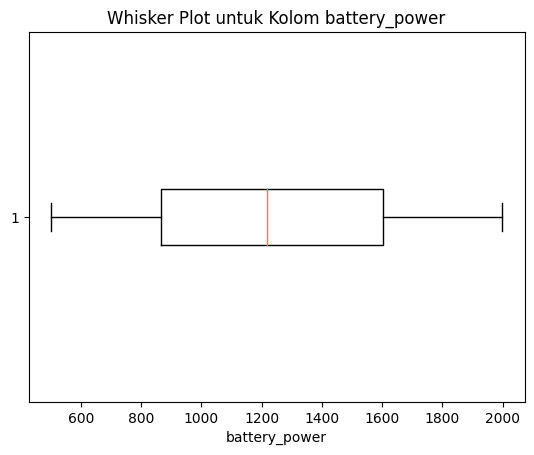

Tidak ada outlier

**Distribusi data**

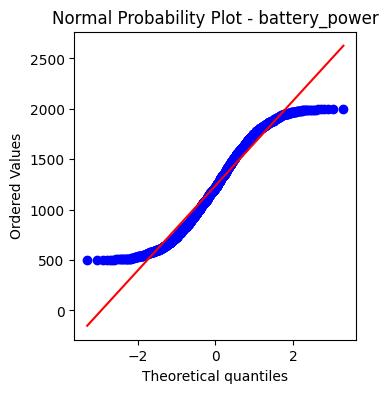

Nilai Kurtosis
-1.1681835057892338


**Kolerasi dengan kolom 'price_range'**

0.18480092449553084


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                                 |
|--------:|:-----------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimum adalah 501 dan nilai max ada                           |
|         | lah 1998. Kemudian Q1 adalah 864.75 , Q2 adalah 1219 dan Q3 adalah 1602. Standar deviasi adalah 430.052 dan mean adalah 1237.15.               |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 737,25                                                                                      |
|       2 | Terdapat beberapa nilai yang muncul sekali pada tabel ini dengan yang paling banyak adalah angka 1068,1330,1949,772 dengan duplikat sebanyak 5 |
|       3 | Tidak ada missing value, Artinya pada kolom ini semua baris mempunyai nilai                                                                    |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -241,125 dan batas atas                       |
|         | sebesar Q3 + 1.5IQR yakni sebesar 2707.875, nilai terkecil adalah 501 dan nilai terbesar adalah 1998 sehingga tidak ada outlier                |
|       5 | Kurtosis bernilai -1.1681835057892338 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata                          |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                                               |
|       6 | Kolerasinya dengan kolom target sebesar 0.18480092449553084 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya                            |
|         | dengan kolom target kurang kuat                                                                                                                |

In [98]:
#Nomor 1 Kolom battery_power
finalValue('battery_power',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimum adalah 501 dan nilai max ada
lah 1998. Kemudian Q1 adalah 864.75 , Q2 adalah 1219 dan Q3 adalah 1602. Standar deviasi adalah 430.052 dan mean adalah 1237.15. 
Dari sini juga dapat disimpulkan bahwa IQR sebesar 737,25'''
string2 = '''Terdapat beberapa nilai yang muncul sekali pada tabel ini dengan yang paling banyak adalah angka 1068,1330,1949,772 dengan duplikat sebanyak 5 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semua baris mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -241,125 dan batas atas 
sebesar Q3 + 1.5IQR yakni sebesar 2707.875, nilai terkecil adalah 501 dan nilai terbesar adalah 1998 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.1681835057892338 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.18480092449553084 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar blue**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 0 |
| freq   |               709 |

**Nilai yang muncul lebih dari sekali blue Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| False |                                   709 |
| True  |                                   691 |

**Missing Value blue Data Train**

'Tidak ada missing value'

**Outlier blue Data Train**

Tidak ada outlier

**Distribusi data**

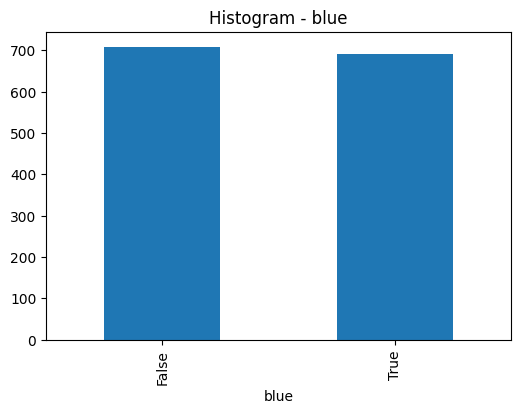

**Kolerasi dengan kolom 'price_range'**

0.041946888607414363


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                               |
|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400               |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 709 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada value yang sama yakni 1(True) sebanyak 609 dan 0(False) sebanyak 709                        |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                     |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                 |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                 |
|       6 | Kolerasinya dengan kolom target sebesar 0.041946888607414363, nilai kolerasi jauh dari angka 1, mendekati angka 0                            |
|         | sehingga kolerasinya tidak kuat                                                                                                              |

In [47]:
#Nomor 2 kolom blue 
finalValue('blue',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 709'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada value yang sama yakni 1(True) sebanyak 609 dan 0(False) sebanyak 709'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.041946888607414363, nilai kolerasi jauh dari angka 1, mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar clock_speed**

|       |   Statistik Dasar |
|:------|------------------:|
| count |       1400        |
| mean  |          1.52171  |
| std   |          0.814723 |
| min   |          0.5      |
| 25%   |          0.7      |
| 50%   |          1.5      |
| 75%   |          2.2      |
| max   |          3        |

**Nilai yang muncul lebih dari sekali clock_speed Data Train**

|     |   Nilai yang lebih muncul dari sekali |
|----:|--------------------------------------:|
| 0.5 |                                   287 |
| 0.6 |                                    61 |
| 2.3 |                                    57 |
| 2.8 |                                    57 |
| 2.1 |                                    54 |
| 1.6 |                                    53 |
| 2   |                                    51 |
| 1.4 |                                    49 |
| 1.3 |                                    48 |
| 2.5 |                                    48 |
| 2.2 |                                    45 |
| 1.8 |                                    45 |
| 1.5 |                                    44 |
| 0.7 |                                    44 |
| 1.7 |                                    44 |
| 2.6 |                                    43 |
| 1.9 |                                    43 |
| 0.9 |                                    43 |
| 1   |                                    42 |
| 2.9 |                                    42 |
| 2.4 |                                    40 |
| 1.2 |                                    37 |
| 2.7 |                                    37 |
| 0.8 |                                    34 |
| 1.1 |                                    33 |
| 3   |                                    19 |

**Missing Value clock_speed Data Train**

'Tidak ada missing value'

**Outlier clock_speed Data Train**

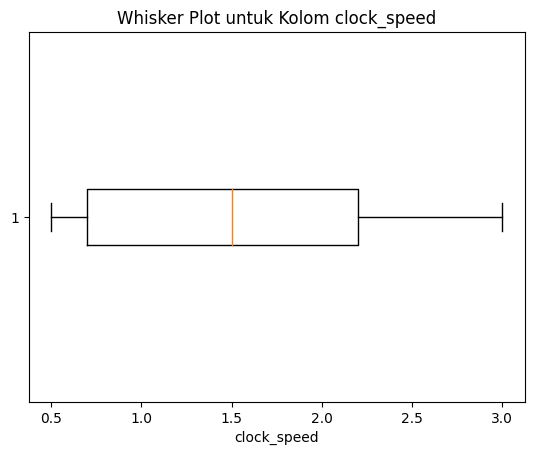

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.3290622936694017


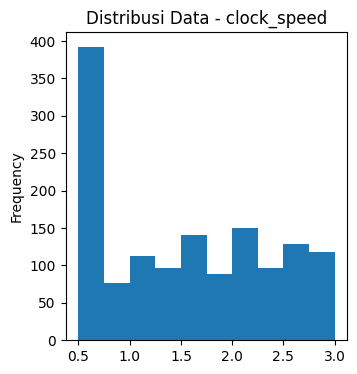

**Kolerasi dengan kolom 'price_range'**

0.014031254818008083


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                                                                                                                           |
|--------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0.5 dan nilai max adalah 3. Nilai Q1 adalah 0.7, Q2 adalah 1.5, dan Q3 adalah 2.2. Standar deviasi adalah 0.814723. Mean bernilai 1.52171 |
|         | Nilai IQR sebesar 1.5                                                                                                                                                                                                                    |
|       2 | Terdapat beberapa nilai yang muncul sekali pada tabel ini dengan yang paling banyak adalah angka 0.5 dengan duplikat sebanyak 287                                                                                                        |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                                                                                                                 |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1.75 dan batas atas                                                                                                                    |
|         | sebesar Q3 + 1.5IQR yakni sebesar 4.45. Nilai terkecil adalah 0.5 dan nilai terbesar adalah 3 sehingga tidak ada outlier                                                                                                                 |
|       5 | Kurtosis bernilai -1.3290622936694017 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata                                                                                                                    |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                                                                                                                                         |
|       6 | Kolerasinya dengan kolom target sebesar 0.014031254818008083 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya                                                                                                                     |
|         | dengan kolom target kurang kuat                                                                                                                                                                                                          |

In [48]:
#Nomor 3 Kolom lock_speed
finalValue('clock_speed',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0.5 dan nilai max adalah 3. Nilai Q1 adalah 0.7, Q2 adalah 1.5, dan Q3 adalah 2.2. Standar deviasi adalah 0.814723. Mean bernilai 1.52171
Nilai IQR sebesar 1.5'''
string2 = '''Terdapat beberapa nilai yang muncul sekali pada tabel ini dengan yang paling banyak adalah angka 0.5 dengan duplikat sebanyak 287 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1.75 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 4.45. Nilai terkecil adalah 0.5 dan nilai terbesar adalah 3 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.3290622936694017 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.014031254818008083 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar dual_sim**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 1 |
| freq   |               704 |

**Nilai yang muncul lebih dari sekali dual_sim Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| True  |                                   704 |
| False |                                   696 |

**Missing Value dual_sim Data Train**

'Tidak ada missing value'

**Outlier dual_sim Data Train**

Tidak ada outlier

**Distribusi data**

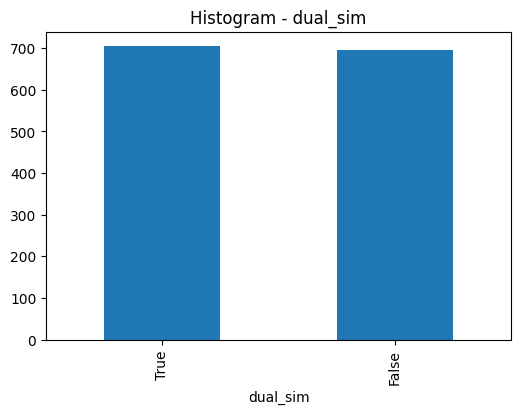

**Kolerasi dengan kolom 'price_range'**

-0.01075616373764109


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                              |
|--------:|:--------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400              |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 704 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada value yang muncul lebih dari sekali yakni 1(True) sebanyak 704 dan 0(False) sebanyak 696   |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                    |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                |
|       6 | Kolerasinya dengan kolom target sebesar -0.01075616373764109, nilai kolerasi jauh dari angka 1, mendekati angka 0                           |
|         | sehingga kolerasinya tidak kuat                                                                                                             |

In [49]:
#Nomor 4 kolom dual_sim 
finalValue('dual_sim',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 704'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada value yang muncul lebih dari sekali yakni 1(True) sebanyak 704 dan 0(False) sebanyak 696'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.01075616373764109, nilai kolerasi jauh dari angka 1, mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5,string6)

**Statistika Dasar fc**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           4.275   |
| std   |           4.32417 |
| min   |           0       |
| 25%   |           1       |
| 50%   |           3       |
| 75%   |           7       |
| max   |          19       |

**Nilai yang muncul lebih dari sekali fc Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
|  0 |                                   338 |
|  1 |                                   172 |
|  2 |                                   133 |
|  3 |                                   117 |
|  5 |                                    98 |
|  4 |                                    87 |
|  7 |                                    75 |
|  6 |                                    73 |
|  9 |                                    60 |
|  8 |                                    59 |
| 10 |                                    40 |
| 11 |                                    33 |
| 12 |                                    29 |
| 13 |                                    26 |
| 16 |                                    18 |
| 15 |                                    16 |
| 14 |                                    15 |
| 18 |                                     7 |
| 17 |                                     3 |

**Missing Value fc Data Train**

'Tidak ada missing value'

**Outlier fc Data Train**

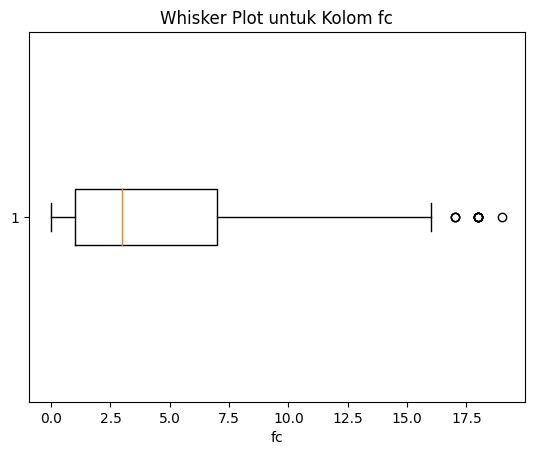

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
0.28807491164573396


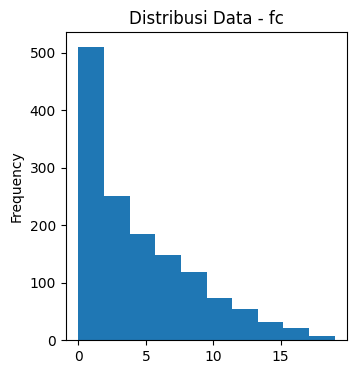

**Kolerasi dengan kolom 'price_range'**

-0.003842010298191734


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                      |
|--------:|:------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada                  |
|         | lah 19. Q1 adalah 1, Q2 adalah 3 dan Q3 adalah 7. Standar deviasi adalah 4.32417 dan mean 4.275                                     |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 6                                                                                |
|       2 | Terdapat beberapa nilai yang muncul lebih dari sekali pada tabel ini dengan yang paling banyak adalah angka 0 duplikat sebanyak 338 |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                            |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -8 dan batas atas                  |
|         | sebesar Q3 + 1.5IQR yakni sebesar 16 nilai terkecil adalah 0 dan nilai terbesar adalah 19 sehingga tidak ada outlier                |
|       5 | Kurtosis bernilai 0.28807491164573396 (positif) merupakan distribusi platykurtik ditandai oleh sebaran yang lebih luas              |
|         | dan ekor yang lebih pendek dibandingkan dengan distribusi normal.                                                                   |
|       6 | Kolerasinya dengan kolom target sebesar -0.003842010298191734 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya               |
|         | dengan kolom target kurang kuat justru cenderung berbanding terbalik                                                                |

In [50]:
#Nomor 5 Kolom fc
finalValue('fc',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 19. Q1 adalah 1, Q2 adalah 3 dan Q3 adalah 7. Standar deviasi adalah 4.32417 dan mean 4.275
Dari sini juga dapat disimpulkan bahwa IQR sebesar 6'''
string2 = '''Terdapat beberapa nilai yang muncul lebih dari sekali pada tabel ini dengan yang paling banyak adalah angka 0 duplikat sebanyak 338 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -8 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 16 nilai terkecil adalah 0 dan nilai terbesar adalah 19 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai 0.28807491164573396 (positif) merupakan distribusi platykurtik ditandai oleh sebaran yang lebih luas 
dan ekor yang lebih pendek dibandingkan dengan distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.003842010298191734 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat justru cenderung berbanding terbalik'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar four_g**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 1 |
| freq   |               742 |

**Nilai yang muncul lebih dari sekali four_g Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| True  |                                   742 |
| False |                                   658 |

**Missing Value four_g Data Train**

'Tidak ada missing value'

**Outlier four_g Data Train**

Tidak ada outlier

**Distribusi data**

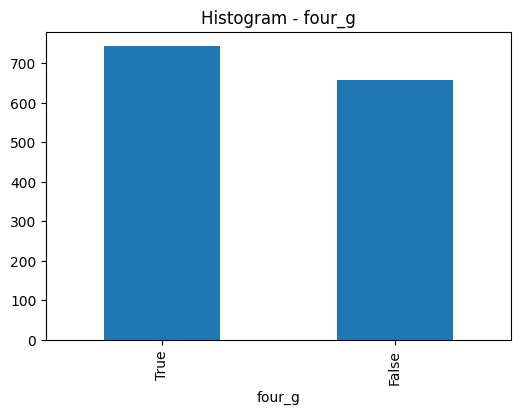

**Kolerasi dengan kolom 'price_range'**

0.0005508484718002661


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                              |
|--------:|:--------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400              |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 742 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 742 dan 0(False) sebanyak 658                       |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                    |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                |
|       6 | Kolerasinya dengan kolom target sebesar 0.0005508484718002661, nilai kolerasi jauh dari angka 1, mendekati angka 0                          |
|         | sehingga kolerasinya tidak kuat                                                                                                             |

In [51]:
#Nomor 6 kolom four_g 
finalValue('four_g',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 742'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 742 dan 0(False) sebanyak 658'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.0005508484718002661, nilai kolerasi jauh dari angka 1, mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar int_memory**

|       |   Statistik Dasar |
|:------|------------------:|
| count |         1400      |
| mean  |           31.9621 |
| std   |           18.163  |
| min   |            2      |
| 25%   |           16      |
| 50%   |           32      |
| 75%   |           48      |
| max   |           64      |

**Nilai yang muncul lebih dari sekali int_memory Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
| 27 |                                    36 |
| 16 |                                    30 |
| 19 |                                    29 |
|  5 |                                    29 |
| 42 |                                    28 |
| 23 |                                    28 |
| 50 |                                    28 |
|  2 |                                    28 |
| 14 |                                    28 |
| 33 |                                    28 |
| 11 |                                    27 |
| 30 |                                    27 |
| 12 |                                    27 |
| 52 |                                    27 |
|  7 |                                    26 |
|  6 |                                    26 |
|  8 |                                    26 |
| 41 |                                    26 |
| 58 |                                    26 |
|  9 |                                    25 |
| 20 |                                    25 |
| 10 |                                    25 |
| 45 |                                    25 |
| 40 |                                    25 |
| 44 |                                    24 |
| 57 |                                    24 |
| 32 |                                    23 |
| 54 |                                    23 |
| 35 |                                    22 |
| 61 |                                    22 |
| 36 |                                    22 |
| 18 |                                    21 |
| 15 |                                    21 |
| 34 |                                    21 |
| 47 |                                    21 |
| 13 |                                    21 |
| 26 |                                    21 |
| 49 |                                    21 |
| 53 |                                    21 |
| 55 |                                    20 |
| 51 |                                    20 |
| 17 |                                    20 |
| 60 |                                    20 |
| 64 |                                    20 |
| 46 |                                    20 |
| 21 |                                    20 |
| 48 |                                    19 |
| 24 |                                    19 |
| 56 |                                    18 |
| 63 |                                    17 |
| 29 |                                    17 |
| 39 |                                    17 |
| 31 |                                    17 |
|  3 |                                    17 |
| 38 |                                    16 |
| 28 |                                    16 |
| 22 |                                    16 |
| 62 |                                    16 |
| 59 |                                    15 |
| 25 |                                    15 |
| 37 |                                    15 |
|  4 |                                    14 |
| 43 |                                    13 |

**Missing Value int_memory Data Train**

'Tidak ada missing value'

**Outlier int_memory Data Train**

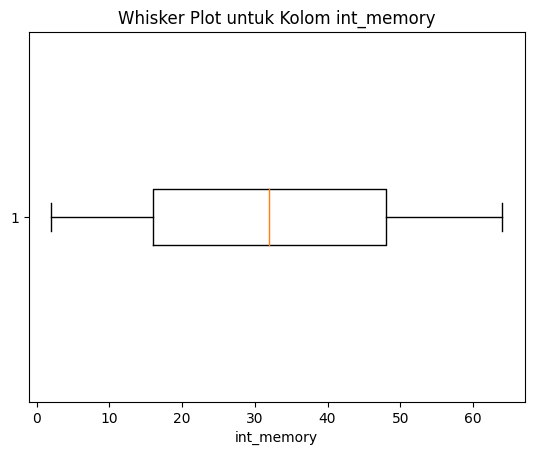

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.2271038904205902


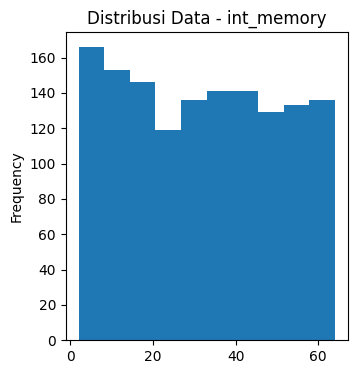

**Kolerasi dengan kolom 'price_range'**

0.026175706877841595


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 2 dan nilai max ada     |
|         | lah 64. Kemudian Q1 adalah 16, Q2 adalah 32 dan Q3 adalah 48 standar deviasi adalah 18.163 dan mean 31.9621            |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 32                                                                  |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 27, duplicate sebanyak 36           |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -32 dan batas atas    |
|         | sebesar Q3 + 1.5IQR yakni sebesar 96 nilai terkecil adalah 2 dan nilai terbesar adalah 64 sehingga tidak ada outlier   |
|       5 | Kurtosis bernilai -1.2271038904205902 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar 0.026175706877841595                                                           |
|         |  , nilai kolerasi jauh dari angka 1 sehingga kolerasinya                                                               |
|         | dengan kolom target kurang kuat                                                                                        |

In [52]:
#Nomor 7 Kolom int_memory
finalValue('int_memory',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 2 dan nilai max ada
lah 64. Kemudian Q1 adalah 16, Q2 adalah 32 dan Q3 adalah 48 standar deviasi adalah 18.163 dan mean 31.9621
Dari sini juga dapat disimpulkan bahwa IQR sebesar 32'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 27, duplicate sebanyak 36 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -32 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 96 nilai terkecil adalah 2 dan nilai terbesar adalah 64 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.2271038904205902 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.026175706877841595
 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar m_dep**

|       |   Statistik Dasar |
|:------|------------------:|
| count |       1400        |
| mean  |          0.507857 |
| std   |          0.288539 |
| min   |          0.1      |
| 25%   |          0.2      |
| 50%   |          0.5      |
| 75%   |          0.8      |
| max   |          1        |

**Nilai yang muncul lebih dari sekali m_dep Data Train**

|     |   Nilai yang lebih muncul dari sekali |
|----:|--------------------------------------:|
| 0.1 |                                   223 |
| 0.8 |                                   146 |
| 0.3 |                                   146 |
| 0.7 |                                   144 |
| 0.5 |                                   142 |
| 0.9 |                                   137 |
| 0.6 |                                   137 |
| 0.2 |                                   133 |
| 0.4 |                                   113 |
| 1   |                                    79 |

**Missing Value m_dep Data Train**

'Tidak ada missing value'

**Outlier m_dep Data Train**

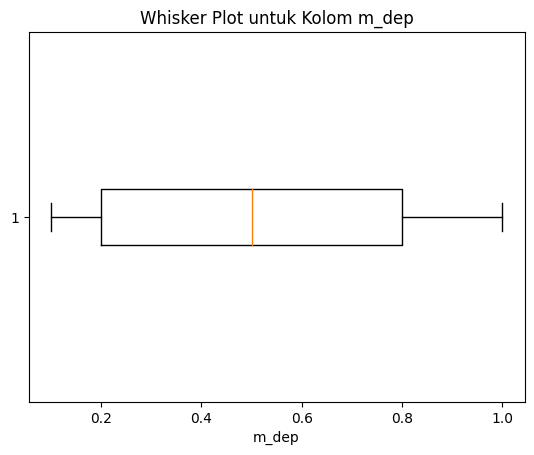

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.266585482565444


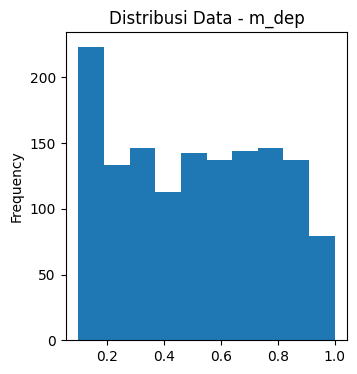

**Kolerasi dengan kolom 'price_range'**

0.0012049180209846337


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0.1 dan nilai max ada   |
|         | lah 1. Kemudian Q1 adalah 0.2, Q2 adalah 0.5 dan Q3 adalah 0.8 standar deviasi adalah 0.288539 dan mean 0.507857       |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 0.6                                                                 |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 0.1 duplicate sebanyak 223          |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -0.7 dan batas atas   |
|         | sebesar Q3 + 1.5IQR yakni sebesar 1.7 nilai terkecil adalah 0.1 dan nilai terbesar adalah 1 sehingga tidak ada outlier |
|       5 | Kurtosis bernilai -1.266585482565444 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata   |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar 0.0012049180209846337 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya  |
|         | dengan kolom target kurang kuat                                                                                        |

In [53]:
#Nomor 8 Kolom m_dep
finalValue('m_dep',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0.1 dan nilai max ada
lah 1. Kemudian Q1 adalah 0.2, Q2 adalah 0.5 dan Q3 adalah 0.8 standar deviasi adalah 0.288539 dan mean 0.507857
Dari sini juga dapat disimpulkan bahwa IQR sebesar 0.6'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 0.1 duplicate sebanyak 223 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -0.7 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 1.7 nilai terkecil adalah 0.1 dan nilai terbesar adalah 1 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.266585482565444 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.0012049180209846337 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar mobile_wt**

|       |   Statistik Dasar |
|:------|------------------:|
| count |         1400      |
| mean  |          139.376  |
| std   |           35.4008 |
| min   |           80      |
| 25%   |          108      |
| 50%   |          139      |
| 75%   |          169      |
| max   |          200      |

**Nilai yang muncul lebih dari sekali mobile_wt Data Train**

|     |   Nilai yang lebih muncul dari sekali |
|----:|--------------------------------------:|
| 182 |                                    22 |
| 105 |                                    21 |
| 101 |                                    21 |
| 198 |                                    20 |
| 185 |                                    20 |
|  89 |                                    19 |
| 104 |                                    19 |
|  80 |                                    19 |
| 131 |                                    18 |
| 111 |                                    17 |
| 114 |                                    16 |
| 157 |                                    16 |
| 169 |                                    16 |
| 199 |                                    16 |
| 146 |                                    16 |
| 138 |                                    15 |
| 145 |                                    15 |
| 123 |                                    15 |
| 159 |                                    15 |
| 124 |                                    14 |
| 100 |                                    14 |
| 150 |                                    14 |
| 162 |                                    14 |
| 160 |                                    14 |
| 103 |                                    14 |
|  86 |                                    14 |
|  88 |                                    14 |
| 134 |                                    14 |
|  82 |                                    14 |
| 113 |                                    13 |
| 158 |                                    13 |
| 130 |                                    13 |
|  83 |                                    13 |
| 181 |                                    13 |
|  91 |                                    13 |
| 155 |                                    13 |
| 107 |                                    13 |
| 156 |                                    13 |
| 109 |                                    13 |
| 132 |                                    13 |
| 148 |                                    12 |
| 163 |                                    12 |
| 193 |                                    12 |
| 139 |                                    12 |
| 135 |                                    12 |
| 178 |                                    12 |
| 161 |                                    12 |
| 164 |                                    12 |
|  85 |                                    12 |
| 177 |                                    12 |
| 151 |                                    12 |
| 186 |                                    12 |
| 196 |                                    12 |
|  84 |                                    12 |
| 147 |                                    11 |
| 144 |                                    11 |
| 200 |                                    11 |
| 115 |                                    11 |
| 191 |                                    11 |
| 122 |                                    11 |
| 194 |                                    11 |
| 184 |                                    11 |
| 128 |                                    11 |
| 136 |                                    11 |
| 174 |                                    11 |
| 117 |                                    11 |
| 118 |                                    11 |
| 129 |                                    11 |
| 180 |                                    11 |
| 172 |                                    11 |
| 133 |                                    11 |
| 102 |                                    11 |
| 197 |                                    11 |
| 187 |                                    11 |
| 168 |                                    10 |
| 142 |                                    10 |
| 166 |                                    10 |
|  99 |                                    10 |
| 126 |                                    10 |
| 112 |                                    10 |
|  94 |                                    10 |
|  87 |                                    10 |
| 119 |                                    10 |
|  90 |                                    10 |
| 154 |                                    10 |
| 106 |                                    10 |
| 153 |                                    10 |
| 190 |                                    10 |
| 183 |                                     9 |
|  81 |                                     9 |
| 170 |                                     9 |
| 110 |                                     9 |
| 165 |                                     9 |
| 149 |                                     9 |
|  95 |                                     9 |
| 173 |                                     9 |
| 171 |                                     9 |
| 141 |                                     9 |
|  92 |                                     9 |
| 152 |                                     8 |
| 121 |                                     8 |
| 192 |                                     8 |
| 167 |                                     8 |
| 195 |                                     8 |
| 116 |                                     8 |
| 179 |                                     8 |
| 176 |                                     8 |
|  97 |                                     8 |
|  93 |                                     8 |
| 120 |                                     7 |
| 125 |                                     7 |
| 189 |                                     7 |
| 175 |                                     7 |
|  98 |                                     7 |
| 127 |                                     6 |
| 108 |                                     6 |
| 137 |                                     6 |
| 188 |                                     6 |
|  96 |                                     5 |
| 140 |                                     5 |
| 143 |                                     5 |

**Missing Value mobile_wt Data Train**

'Tidak ada missing value'

**Outlier mobile_wt Data Train**

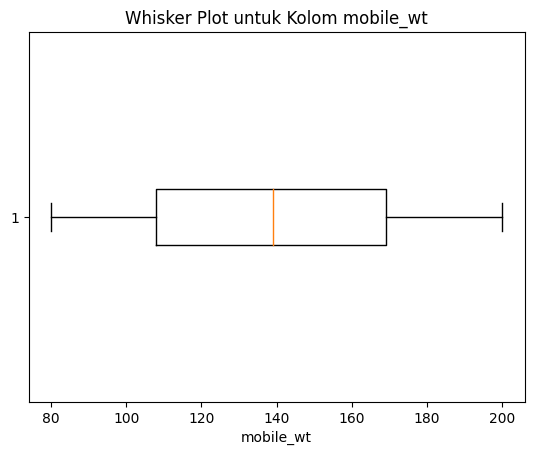

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.2101668323623873


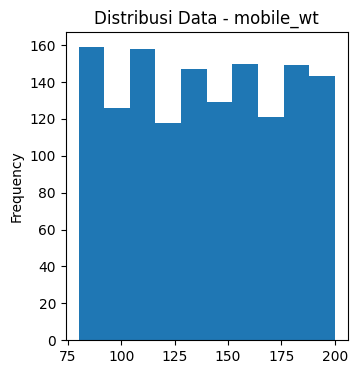

**Kolerasi dengan kolom 'price_range'**

-0.07476875048323661


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                            |
|--------:|:--------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 80 dan nilai max ada       |
|         | lah 200. Kemudian Q1 adalah 108, Q2 adalah 139 dan Q3 adalah 169 standar deviasi adalah 35.4008 dan mean 139.376          |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 161                                                                    |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 182 duplicate sebanyak 22              |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                  |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -133.5 dan batas atas    |
|         | sebesar Q3 + 1.5IQR yakni sebesar 410,5 nilai terkecil adalah 80 dan nilai terbesar adalah 200 sehingga tidak ada outlier |
|       5 | Kurtosis bernilai -1.2101668323623873 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata     |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                          |
|       6 | Kolerasinya dengan kolom target sebesar -0.07476875048323661 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya      |
|         | dengan kolom target kurang kuat                                                                                           |

In [54]:
#Nomor 9 Kolom mobile_wt
finalValue('mobile_wt',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 80 dan nilai max ada
lah 200. Kemudian Q1 adalah 108, Q2 adalah 139 dan Q3 adalah 169 standar deviasi adalah 35.4008 dan mean 139.376
Dari sini juga dapat disimpulkan bahwa IQR sebesar 161'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 182 duplicate sebanyak 22 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -133.5 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 410,5 nilai terkecil adalah 80 dan nilai terbesar adalah 200 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.2101668323623873 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.07476875048323661 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar n_cores**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           4.48143 |
| std   |           2.27984 |
| min   |           1       |
| 25%   |           2       |
| 50%   |           4       |
| 75%   |           7       |
| max   |           8       |

**Nilai yang muncul lebih dari sekali n_cores Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
|  4 |                                   198 |
|  7 |                                   189 |
|  2 |                                   183 |
|  1 |                                   170 |
|  5 |                                   170 |
|  3 |                                   167 |
|  8 |                                   167 |
|  6 |                                   156 |

**Missing Value n_cores Data Train**

'Tidak ada missing value'

**Outlier n_cores Data Train**

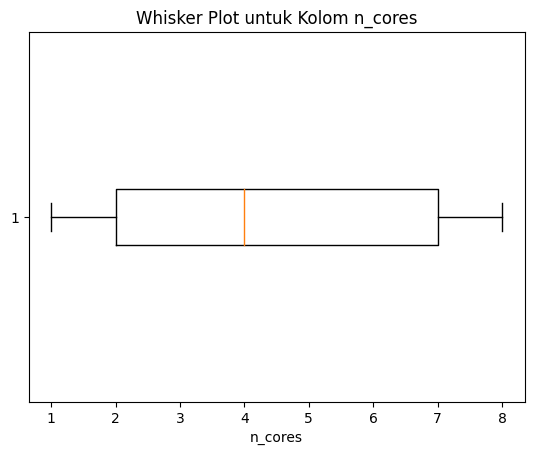

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.2320948787955932


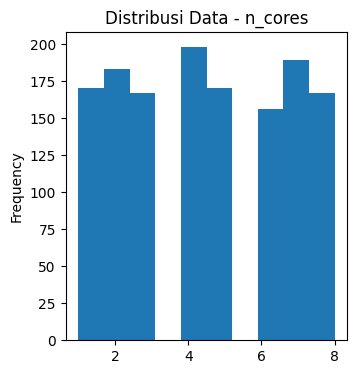

**Kolerasi dengan kolom 'price_range'**

-0.0005823306285452805


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada     |
|         | lah 1960. Kemudian Q1 adalah 2, Q2 adalah 4 dan Q3 adalah 7 standar deviasi adalah 2.27984 dan mean 4.48143            |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 5                                                                   |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 4 duplicate sebanyak 198            |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -5,5 dan batas atas   |
|         | sebesar Q3 + 1.5IQR yakni sebesar 14.5 nilai terkecil adalah 1 dan nilai terbesar adalah 8 sehingga tidak ada outlier  |
|       5 | Kurtosis bernilai -1.2320948787955932 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar -0.0005823306285452805 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya |
|         | dengan kolom target kurang kuat adapun jika berpengaruh dia akan berbanding terbalik                                   |

In [55]:
#Nomor 10 Kolom n_cores
finalValue('n_cores',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 1960. Kemudian Q1 adalah 2, Q2 adalah 4 dan Q3 adalah 7 standar deviasi adalah 2.27984 dan mean 4.48143
Dari sini juga dapat disimpulkan bahwa IQR sebesar 5'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 4 duplicate sebanyak 198 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -5,5 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 14.5 nilai terkecil adalah 1 dan nilai terbesar adalah 8 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.2320948787955932 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.0005823306285452805 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat adapun jika berpengaruh dia akan berbanding terbalik'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar pc**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           9.91714 |
| std   |           6.08002 |
| min   |           0       |
| 25%   |           5       |
| 50%   |          10       |
| 75%   |          15       |
| max   |          20       |

**Nilai yang muncul lebih dari sekali pc Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
| 10 |                                    91 |
|  7 |                                    87 |
| 20 |                                    82 |
|  9 |                                    80 |
|  2 |                                    74 |
| 14 |                                    72 |
|  1 |                                    71 |
|  0 |                                    70 |
|  4 |                                    66 |
| 19 |                                    65 |
|  3 |                                    65 |
| 17 |                                    64 |
| 15 |                                    64 |
| 16 |                                    62 |
| 12 |                                    60 |
|  8 |                                    59 |
| 11 |                                    59 |
| 13 |                                    58 |
|  6 |                                    57 |
| 18 |                                    49 |
|  5 |                                    45 |

**Missing Value pc Data Train**

'Tidak ada missing value'

**Outlier pc Data Train**

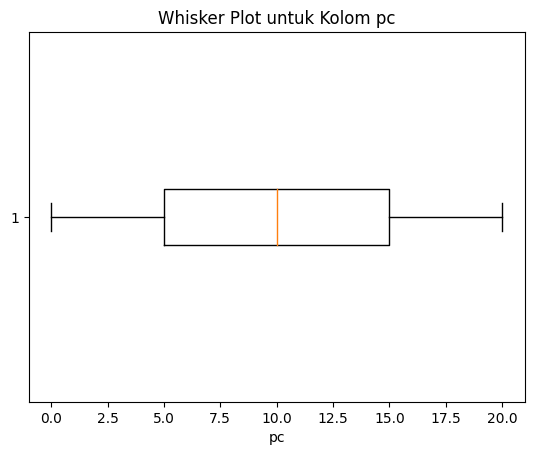

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.1640061988940513


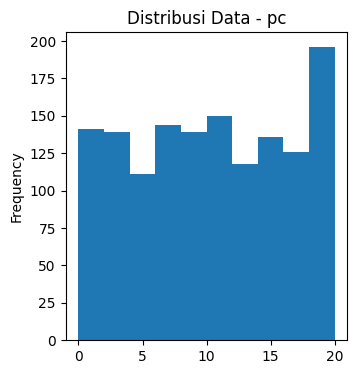

**Kolerasi dengan kolom 'price_range'**

-0.005214430491652989


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada     |
|         | lah 20. Kemudian Q1 adalah 5, Q2 adalah 10, dan Q3 adalah 15. standar deviasi adalah 6.08002 dan mean 9.91714          |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 10                                                                  |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 10 duplicate sebanyak 91            |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -10 dan batas atas    |
|         | sebesar Q3 + 1.5IQR yakni sebesar 30 nilai terkecil adalah 0 dan nilai terbesar adalah 20 sehingga tidak ada outlier   |
|       5 | Kurtosis bernilai -1.1640061988940513 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar -0.005214430491652989 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya  |
|         | dengan kolom target kurang kuat                                                                                        |

In [56]:
#Nomor 11 Kolom pc
finalValue('pc',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 20. Kemudian Q1 adalah 5, Q2 adalah 10, dan Q3 adalah 15. standar deviasi adalah 6.08002 dan mean 9.91714
Dari sini juga dapat disimpulkan bahwa IQR sebesar 10'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 10 duplicate sebanyak 91 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -10 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 30 nilai terkecil adalah 0 dan nilai terbesar adalah 20 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.1640061988940513 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.005214430491652989 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar px_height**

|       |   Statistik Dasar |
|:------|------------------:|
| count |          1400     |
| mean  |           643.178 |
| std   |           444.629 |
| min   |             0     |
| 25%   |           273.75  |
| 50%   |           561     |
| 75%   |           950.25  |
| max   |          1960     |

**Nilai yang muncul lebih dari sekali px_height Data Train**

|      |   Nilai yang lebih muncul dari sekali |
|-----:|--------------------------------------:|
|  347 |                                     5 |
|   88 |                                     5 |
|  526 |                                     5 |
|  730 |                                     4 |
|  140 |                                     4 |
|  217 |                                     4 |
|  447 |                                     4 |
|  831 |                                     4 |
|  632 |                                     4 |
|  322 |                                     4 |
|  416 |                                     4 |
|  273 |                                     4 |
|  919 |                                     4 |
|  275 |                                     4 |
|  229 |                                     4 |
|  410 |                                     4 |
|  179 |                                     4 |
|  293 |                                     4 |
| 1111 |                                     3 |
|  168 |                                     3 |
|  300 |                                     3 |
|  211 |                                     3 |
|  327 |                                     3 |
|   96 |                                     3 |
|  622 |                                     3 |
|  207 |                                     3 |
|  356 |                                     3 |
|  329 |                                     3 |
|  690 |                                     3 |
|  268 |                                     3 |
|  881 |                                     3 |
|  935 |                                     3 |
|  713 |                                     3 |
|  154 |                                     3 |
|  371 |                                     3 |
|  629 |                                     3 |
|  150 |                                     3 |
|  320 |                                     3 |
|  547 |                                     3 |
|   90 |                                     3 |
|  119 |                                     3 |
|  253 |                                     3 |
|   59 |                                     3 |
|  398 |                                     3 |
|  186 |                                     3 |
| 1055 |                                     3 |
|  335 |                                     3 |
|  358 |                                     3 |
|  798 |                                     3 |
|   58 |                                     3 |
|  271 |                                     3 |
|  204 |                                     3 |
|  262 |                                     3 |
|  518 |                                     3 |
|  431 |                                     3 |
|  651 |                                     3 |
|  419 |                                     3 |
|  584 |                                     3 |
|  380 |                                     3 |
|  395 |                                     3 |
|  332 |                                     3 |
|  344 |                                     3 |
| 1109 |                                     3 |
|  214 |                                     3 |
|  291 |                                     3 |
|  163 |                                     3 |
|  961 |                                     3 |
| 1064 |                                     3 |
|  311 |                                     3 |
|  655 |                                     3 |
|  533 |                                     3 |
|  381 |                                     3 |
|  777 |                                     3 |
|   56 |                                     3 |
| 1028 |                                     3 |
|   79 |                                     3 |
|  781 |                                     3 |
|  674 |                                     3 |
|  404 |                                     3 |
|  667 |                                     3 |
|  199 |                                     3 |
|  159 |                                     3 |
|  670 |                                     3 |
|   46 |                                     3 |
|  942 |                                     3 |
|  333 |                                     3 |
|  286 |                                     3 |
|  236 |                                     3 |
|  564 |                                     3 |
|  160 |                                     3 |
|  251 |                                     3 |
|  306 |                                     3 |
| 1331 |                                     3 |
| 1314 |                                     3 |
|   85 |                                     3 |
|   83 |                                     3 |
|  125 |                                     2 |
|  743 |                                     2 |
|  189 |                                     2 |
| 1571 |                                     2 |
|  793 |                                     2 |
|  161 |                                     2 |
|  148 |                                     2 |
|  838 |                                     2 |
|  511 |                                     2 |
|  212 |                                     2 |
|  818 |                                     2 |
|   64 |                                     2 |
|   42 |                                     2 |
|  225 |                                     2 |
|   81 |                                     2 |
| 1399 |                                     2 |
|  581 |                                     2 |
|  227 |                                     2 |
|  190 |                                     2 |
|  346 |                                     2 |
|  308 |                                     2 |
|  117 |                                     2 |
|  839 |                                     2 |
|  717 |                                     2 |
|  649 |                                     2 |
|  683 |                                     2 |
|  205 |                                     2 |
|   86 |                                     2 |
|  382 |                                     2 |
|  553 |                                     2 |
|  570 |                                     2 |
|  859 |                                     2 |
|  379 |                                     2 |
| 1054 |                                     2 |
| 1092 |                                     2 |
|  409 |                                     2 |
|  905 |                                     2 |
| 1222 |                                     2 |
|   68 |                                     2 |
|  747 |                                     2 |
|  519 |                                     2 |
|  527 |                                     2 |
|  206 |                                     2 |
|  471 |                                     2 |
| 1179 |                                     2 |
| 1172 |                                     2 |
|  741 |                                     2 |
|  681 |                                     2 |
|  386 |                                     2 |
|  223 |                                     2 |
|  181 |                                     2 |
|  954 |                                     2 |
|  754 |                                     2 |
|  338 |                                     2 |
|  757 |                                     2 |
|  202 |                                     2 |
|  299 |                                     2 |
|  599 |                                     2 |
|  433 |                                     2 |
|  233 |                                     2 |
| 1482 |                                     2 |
|  473 |                                     2 |
|  759 |                                     2 |
|  297 |                                     2 |
|  167 |                                     2 |
|   39 |                                     2 |
|  385 |                                     2 |
|  258 |                                     2 |
|  647 |                                     2 |
|  776 |                                     2 |
|   71 |                                     2 |
|  442 |                                     2 |
|  532 |                                     2 |
|  561 |                                     2 |
|  364 |                                     2 |
|  331 |                                     2 |
| 1168 |                                     2 |
|  504 |                                     2 |
|  912 |                                     2 |
|  837 |                                     2 |
|  758 |                                     2 |
|  484 |                                     2 |
|  417 |                                     2 |
|  323 |                                     2 |
|   19 |                                     2 |
|  466 |                                     2 |
|  963 |                                     2 |
|  574 |                                     2 |
| 1091 |                                     2 |
| 1194 |                                     2 |
| 1325 |                                     2 |
| 1208 |                                     2 |
|  127 |                                     2 |
|  403 |                                     2 |
| 1563 |                                     2 |
| 1187 |                                     2 |
|  902 |                                     2 |
| 1012 |                                     2 |
|  118 |                                     2 |
|   35 |                                     2 |
|  478 |                                     2 |
|   52 |                                     2 |
|  176 |                                     2 |
| 1100 |                                     2 |
|  543 |                                     2 |
|  499 |                                     2 |
|  295 |                                     2 |
|  436 |                                     2 |
|  361 |                                     2 |
|  480 |                                     2 |
| 1171 |                                     2 |
| 1052 |                                     2 |
|  313 |                                     2 |
|  126 |                                     2 |
|  290 |                                     2 |
|  492 |                                     2 |
|  699 |                                     2 |
|  209 |                                     2 |
|  767 |                                     2 |
| 1107 |                                     2 |
| 1177 |                                     2 |
|  192 |                                     2 |
|  762 |                                     2 |
|  169 |                                     2 |
| 1191 |                                     2 |
|   48 |                                     2 |
| 1086 |                                     2 |
|  522 |                                     2 |
|  366 |                                     2 |
|  861 |                                     2 |
|  284 |                                     2 |
|  885 |                                     2 |
|  937 |                                     2 |
| 1013 |                                     2 |
|  142 |                                     2 |
|  590 |                                     2 |
|  591 |                                     2 |
|  336 |                                     2 |
|  115 |                                     2 |
| 1003 |                                     2 |
|  724 |                                     2 |
| 1134 |                                     2 |
|  191 |                                     2 |
|  938 |                                     2 |
|  600 |                                     2 |
|  951 |                                     2 |
|  785 |                                     2 |
|  114 |                                     2 |
|  531 |                                     2 |
|  287 |                                     2 |
|  706 |                                     2 |
|  948 |                                     2 |
|   43 |                                     2 |
|  788 |                                     2 |
|  725 |                                     2 |
|  867 |                                     2 |
| 1058 |                                     2 |
|  897 |                                     2 |
|  468 |                                     2 |
|  773 |                                     2 |
|  263 |                                     2 |
| 1362 |                                     2 |
|  267 |                                     2 |
|  111 |                                     2 |
|  607 |                                     2 |
|  173 |                                     2 |
|  461 |                                     2 |
| 1226 |                                     2 |
| 1419 |                                     2 |
|  412 |                                     2 |
|  765 |                                     2 |
| 1230 |                                     2 |
|  405 |                                     2 |
|  982 |                                     2 |
|  105 |                                     2 |
|  491 |                                     2 |
|  486 |                                     2 |
|  430 |                                     2 |
|  281 |                                     2 |
|  782 |                                     2 |
| 1209 |                                     2 |
| 1233 |                                     2 |
| 1392 |                                     2 |
|  983 |                                     2 |
|  231 |                                     2 |
|  494 |                                     2 |
|  742 |                                     2 |
|  174 |                                     2 |
|  485 |                                     2 |
|  560 |                                     2 |
| 1116 |                                     2 |
|  920 |                                     2 |
|  193 |                                     2 |
|  606 |                                     2 |
|  626 |                                     2 |
|   77 |                                     2 |
|  623 |                                     2 |
|  249 |                                     2 |
|  165 |                                     2 |
|  312 |                                     2 |
|  157 |                                     2 |
|  103 |                                     2 |
|  875 |                                     2 |
|  314 |                                     2 |
|  901 |                                     2 |
| 1698 |                                     2 |
|  710 |                                     2 |
|  819 |                                     2 |
| 1081 |                                     2 |
|  854 |                                     2 |
|   91 |                                     2 |
|  238 |                                     2 |
|  120 |                                     2 |
|  512 |                                     2 |
| 1001 |                                     2 |
|  925 |                                     2 |
|  541 |                                     2 |
| 1125 |                                     2 |
|    8 |                                     2 |
|  129 |                                     2 |
|  712 |                                     2 |
| 1175 |                                     2 |
|  276 |                                     2 |
|  985 |                                     2 |
| 1025 |                                     2 |
|  774 |                                     2 |
| 1495 |                                     2 |
|  614 |                                     2 |
|  650 |                                     2 |
|  177 |                                     2 |
|  394 |                                     2 |
|  187 |                                     2 |
|  146 |                                     2 |
|  274 |                                     2 |
|  235 |                                     2 |
|  605 |                                     2 |
|  800 |                                     2 |
|  501 |                                     2 |
|  449 |                                     2 |
|  833 |                                     2 |
|  138 |                                     2 |
|  178 |                                     2 |
| 1024 |                                     2 |
|   98 |                                     2 |
|   65 |                                     2 |
|  550 |                                     2 |
|  687 |                                     2 |
| 1010 |                                     2 |
|  454 |                                     2 |
|   55 |                                     2 |
|  707 |                                     2 |
|  134 |                                     2 |

**Missing Value px_height Data Train**

'Tidak ada missing value'

**Outlier px_height Data Train**

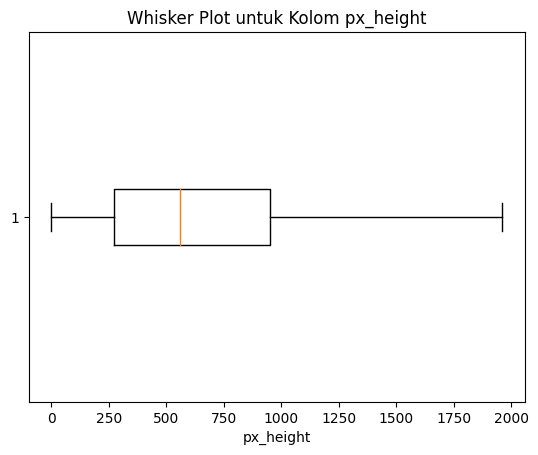

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-0.31938304471706


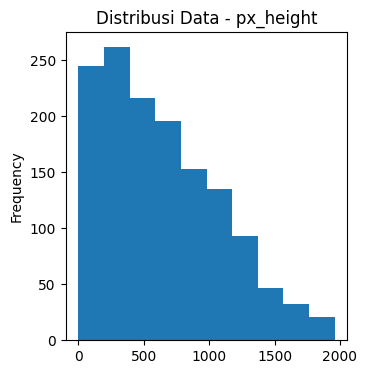

**Kolerasi dengan kolom 'price_range'**

0.15883273548307963


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                           |
|--------:|:-------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada       |
|         | lah 1960. Kemudian Q1 adalah 273.75, Q2 adalah 561 dan Q3 adalah 950.25 standar deviasi adalah 444.629 dan mean 643.178  |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 676,5                                                                 |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 347, 88, dan 526 duplicate sebanyak 5 |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                 |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -741 dan batas atas     |
|         | sebesar Q3 + 1.5IQR yakni sebesar 1965 nilai terkecil adalah 0 dan nilai terbesar adalah 1960 sehingga tidak ada outlier |
|       5 | Kurtosis bernilai -0.31938304471706 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata      |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                         |
|       6 | Kolerasinya dengan kolom target sebesar 0.15883273548307963 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya      |
|         | dengan kolom target kurang kuat                                                                                          |

In [57]:
#Nomor 12 Kolom px_height
finalValue('px_height',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 1960. Kemudian Q1 adalah 273.75, Q2 adalah 561 dan Q3 adalah 950.25 standar deviasi adalah 444.629 dan mean 643.178
Dari sini juga dapat disimpulkan bahwa IQR sebesar 676,5'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 347, 88, dan 526 duplicate sebanyak 5 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -741 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 1965 nilai terkecil adalah 0 dan nilai terbesar adalah 1960 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -0.31938304471706 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.15883273548307963 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar px_width**

|       |   Statistik Dasar |
|:------|------------------:|
| count |          1400     |
| mean  |          1251.72  |
| std   |           428.983 |
| min   |           500     |
| 25%   |           876.5   |
| 50%   |          1247     |
| 75%   |          1627.5   |
| max   |          1998     |

**Nilai yang muncul lebih dari sekali px_width Data Train**

|      |   Nilai yang lebih muncul dari sekali |
|-----:|--------------------------------------:|
| 1247 |                                     6 |
| 1463 |                                     5 |
| 1234 |                                     5 |
| 1923 |                                     5 |
|  882 |                                     4 |
| 1759 |                                     4 |
| 1670 |                                     4 |
| 1011 |                                     4 |
| 1564 |                                     4 |
|  891 |                                     4 |
| 1767 |                                     4 |
|  831 |                                     4 |
| 1079 |                                     4 |
| 1353 |                                     4 |
| 1418 |                                     4 |
| 1393 |                                     4 |
| 1299 |                                     4 |
| 1026 |                                     4 |
| 1203 |                                     4 |
| 1226 |                                     4 |
| 1469 |                                     4 |
|  822 |                                     4 |
|  874 |                                     4 |
| 1666 |                                     4 |
| 1383 |                                     4 |
|  642 |                                     3 |
|  816 |                                     3 |
| 1988 |                                     3 |
|  817 |                                     3 |
| 1435 |                                     3 |
| 1726 |                                     3 |
| 1055 |                                     3 |
| 1849 |                                     3 |
| 1596 |                                     3 |
| 1118 |                                     3 |
| 1304 |                                     3 |
| 1545 |                                     3 |
| 1182 |                                     3 |
| 1264 |                                     3 |
| 1162 |                                     3 |
|  823 |                                     3 |
| 1910 |                                     3 |
| 1933 |                                     3 |
| 1262 |                                     3 |
|  583 |                                     3 |
|  510 |                                     3 |
|  676 |                                     3 |
| 1152 |                                     3 |
|  915 |                                     3 |
| 1330 |                                     3 |
| 1504 |                                     3 |
| 1786 |                                     3 |
| 1046 |                                     3 |
| 1208 |                                     3 |
| 1713 |                                     3 |
| 1018 |                                     3 |
|  736 |                                     3 |
| 1813 |                                     3 |
|  559 |                                     3 |
| 1554 |                                     3 |
| 1814 |                                     3 |
|  989 |                                     3 |
|  963 |                                     3 |
| 1717 |                                     3 |
| 1595 |                                     3 |
| 1724 |                                     3 |
| 1089 |                                     3 |
| 1029 |                                     3 |
|  804 |                                     3 |
| 1224 |                                     3 |
| 1663 |                                     3 |
| 1742 |                                     3 |
| 1931 |                                     3 |
|  563 |                                     3 |
| 1212 |                                     3 |
| 1873 |                                     3 |
| 1477 |                                     3 |
|  679 |                                     3 |
|  818 |                                     3 |
|  970 |                                     3 |
| 1836 |                                     3 |
|  627 |                                     3 |
| 1178 |                                     3 |
| 1441 |                                     3 |
| 1744 |                                     3 |
| 1179 |                                     3 |
| 1317 |                                     3 |
| 1345 |                                     3 |
| 1411 |                                     3 |
|  881 |                                     3 |
| 1429 |                                     3 |
|  952 |                                     3 |
|  682 |                                     3 |
| 1854 |                                     3 |
| 1009 |                                     3 |
|  654 |                                     3 |
|  522 |                                     3 |
|  519 |                                     3 |
| 1723 |                                     2 |
| 1897 |                                     2 |
| 1967 |                                     2 |
| 1704 |                                     2 |
| 1578 |                                     2 |
| 1929 |                                     2 |
| 1235 |                                     2 |
| 1294 |                                     2 |
|  932 |                                     2 |
| 1963 |                                     2 |
|  603 |                                     2 |
| 1377 |                                     2 |
|  956 |                                     2 |
| 1076 |                                     2 |
|  727 |                                     2 |
| 1805 |                                     2 |
| 1876 |                                     2 |
| 1629 |                                     2 |
|  670 |                                     2 |
| 1004 |                                     2 |
|  527 |                                     2 |
| 1073 |                                     2 |
| 1316 |                                     2 |
| 1641 |                                     2 |
|  564 |                                     2 |
| 1532 |                                     2 |
| 1974 |                                     2 |
|  616 |                                     2 |
|  663 |                                     2 |
| 1292 |                                     2 |
| 1947 |                                     2 |
|  728 |                                     2 |
| 1019 |                                     2 |
| 1796 |                                     2 |
| 1727 |                                     2 |
|  836 |                                     2 |
|  899 |                                     2 |
| 1398 |                                     2 |
|  759 |                                     2 |
| 1143 |                                     2 |
| 1905 |                                     2 |
|  557 |                                     2 |
| 1968 |                                     2 |
|  884 |                                     2 |
|  599 |                                     2 |
| 1656 |                                     2 |
|  747 |                                     2 |
|  967 |                                     2 |
| 1702 |                                     2 |
| 1206 |                                     2 |
| 1491 |                                     2 |
| 1291 |                                     2 |
| 1127 |                                     2 |
|  710 |                                     2 |
| 1728 |                                     2 |
| 1643 |                                     2 |
|  675 |                                     2 |
| 1155 |                                     2 |
| 1658 |                                     2 |
| 1623 |                                     2 |
| 1040 |                                     2 |
| 1309 |                                     2 |
| 1331 |                                     2 |
|  999 |                                     2 |
| 1311 |                                     2 |
| 1777 |                                     2 |
|  539 |                                     2 |
| 1517 |                                     2 |
| 1205 |                                     2 |
| 1382 |                                     2 |
| 1613 |                                     2 |
| 1648 |                                     2 |
| 1758 |                                     2 |
| 1032 |                                     2 |
|  507 |                                     2 |
| 1165 |                                     2 |
| 1989 |                                     2 |
| 1673 |                                     2 |
|  938 |                                     2 |
|  681 |                                     2 |
| 1781 |                                     2 |
|  873 |                                     2 |
| 1078 |                                     2 |
| 1958 |                                     2 |
| 1677 |                                     2 |
|  819 |                                     2 |
|  893 |                                     2 |
| 1497 |                                     2 |
|  969 |                                     2 |
| 1416 |                                     2 |
| 1084 |                                     2 |
| 1951 |                                     2 |
| 1942 |                                     2 |
| 1005 |                                     2 |
| 1437 |                                     2 |
|  623 |                                     2 |
| 1917 |                                     2 |
| 1975 |                                     2 |
| 1832 |                                     2 |
|  877 |                                     2 |
|  990 |                                     2 |
|  513 |                                     2 |
|  590 |                                     2 |
|  800 |                                     2 |
| 1539 |                                     2 |
|  683 |                                     2 |
| 1471 |                                     2 |
| 1090 |                                     2 |
| 1062 |                                     2 |
| 1190 |                                     2 |
| 1551 |                                     2 |
| 1985 |                                     2 |
|  775 |                                     2 |
| 1604 |                                     2 |
| 1769 |                                     2 |
| 1352 |                                     2 |
| 1163 |                                     2 |
| 1238 |                                     2 |
|  530 |                                     2 |
| 1492 |                                     2 |
| 1698 |                                     2 |
|  687 |                                     2 |
| 1445 |                                     2 |
| 1259 |                                     2 |
|  550 |                                     2 |
| 1448 |                                     2 |
| 1229 |                                     2 |
|  740 |                                     2 |
|  644 |                                     2 |
| 1256 |                                     2 |
|  709 |                                     2 |
| 1882 |                                     2 |
|  832 |                                     2 |
|  751 |                                     2 |
| 1916 |                                     2 |
| 1809 |                                     2 |
| 1442 |                                     2 |
|  855 |                                     2 |
|  870 |                                     2 |
| 1983 |                                     2 |
|  724 |                                     2 |
|  794 |                                     2 |
| 1838 |                                     2 |
| 1827 |                                     2 |
|  565 |                                     2 |
| 1579 |                                     2 |
| 1739 |                                     2 |
| 1499 |                                     2 |
|  774 |                                     2 |
| 1482 |                                     2 |
|  974 |                                     2 |
|  997 |                                     2 |
|  684 |                                     2 |
|  922 |                                     2 |
| 1452 |                                     2 |
| 1803 |                                     2 |
| 1039 |                                     2 |
| 1456 |                                     2 |
| 1811 |                                     2 |
|  643 |                                     2 |
| 1389 |                                     2 |
| 1638 |                                     2 |
| 1219 |                                     2 |
| 1651 |                                     2 |
| 1167 |                                     2 |
| 1682 |                                     2 |
| 1615 |                                     2 |
| 1293 |                                     2 |
| 1308 |                                     2 |
|  898 |                                     2 |
|  613 |                                     2 |
| 1007 |                                     2 |
| 1195 |                                     2 |
| 1413 |                                     2 |
| 1263 |                                     2 |
|  742 |                                     2 |
| 1099 |                                     2 |
|  697 |                                     2 |
| 1191 |                                     2 |
|  614 |                                     2 |
|  721 |                                     2 |
|  714 |                                     2 |
| 1088 |                                     2 |
| 1686 |                                     2 |
|  660 |                                     2 |
| 1506 |                                     2 |
| 1484 |                                     2 |
|  793 |                                     2 |
| 1970 |                                     2 |
| 1434 |                                     2 |
| 1500 |                                     2 |
| 1553 |                                     2 |
| 1249 |                                     2 |
| 1433 |                                     2 |
| 1948 |                                     2 |
| 1334 |                                     2 |
|  821 |                                     2 |
| 1376 |                                     2 |
| 1652 |                                     2 |
| 1654 |                                     2 |
| 1520 |                                     2 |
| 1350 |                                     2 |
|  705 |                                     2 |
|  730 |                                     2 |
| 1123 |                                     2 |
|  986 |                                     2 |
| 1924 |                                     2 |
| 1177 |                                     2 |
| 1850 |                                     2 |
| 1261 |                                     2 |
| 1025 |                                     2 |
| 1583 |                                     2 |
| 1633 |                                     2 |
| 1793 |                                     2 |
| 1131 |                                     2 |
| 1248 |                                     2 |
| 1244 |                                     2 |
| 1791 |                                     2 |
| 1606 |                                     2 |
| 1364 |                                     2 |
| 1465 |                                     2 |
| 1746 |                                     2 |
|  516 |                                     2 |
|  807 |                                     2 |
| 1782 |                                     2 |
| 1688 |                                     2 |
| 1529 |                                     2 |
| 1710 |                                     2 |
| 1552 |                                     2 |
| 1543 |                                     2 |
| 1738 |                                     2 |
| 1199 |                                     2 |
| 1151 |                                     2 |
|  849 |                                     2 |
| 1284 |                                     2 |
| 1617 |                                     2 |
|  939 |                                     2 |
| 1420 |                                     2 |
|  741 |                                     2 |
| 1858 |                                     2 |
|  517 |                                     2 |
| 1591 |                                     2 |
|  512 |                                     2 |
|  501 |                                     2 |
| 1230 |                                     2 |
|  860 |                                     2 |
|  621 |                                     2 |
|  745 |                                     2 |
| 1614 |                                     2 |
| 1976 |                                     2 |
| 1159 |                                     2 |
| 1020 |                                     2 |
| 1385 |                                     2 |
|  790 |                                     2 |
| 1175 |                                     2 |
|  655 |                                     2 |
|  734 |                                     2 |
| 1409 |                                     2 |
|  912 |                                     2 |
| 1472 |                                     2 |
| 1919 |                                     2 |
|  806 |                                     2 |
| 1747 |                                     2 |
| 1473 |                                     2 |
|  906 |                                     2 |
|  764 |                                     2 |

**Missing Value px_width Data Train**

'Tidak ada missing value'

**Outlier px_width Data Train**

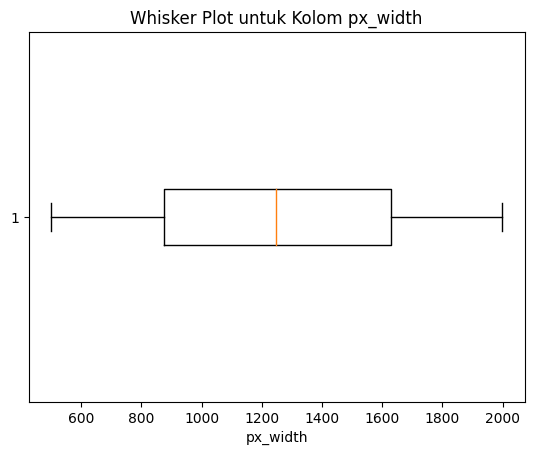

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.1761112837507963


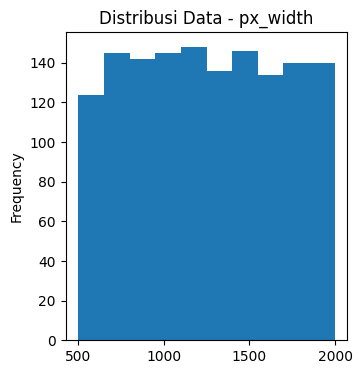

**Kolerasi dengan kolom 'price_range'**

0.1787126901102656


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                     |
|--------:|:-----------------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 500 dan nilai max ada               |
|         | lah 1990. Kemudian Q1 adalah 876.5, Q2 adalah 1247 dan Q3 adalah 1627.5 standar deviasi adalah 428.983 dan mean 1251.72            |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 751                                                                             |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1247 duplicate sebanyak 6 kemudian              |
|         | 1463, 1234, 1923 duplikat sebanyak 5                                                                                               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                           |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -250 dan batas atas               |
|         | sebesar Q3 + 1.5IQR yakni sebesar 2754 nilai terkecil adalah 500 dan nilai terbesar adalah 1990 sehingga tidak ada outlier         |
|       5 | Kurtosis bernilai -1.1761112837507963 (negatif) yang artinya menunjukkan menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                                   |
|       6 | Kolerasinya dengan kolom target sebesar 0.1787126901102656 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya                 |
|         | dengan kolom target kurang kuat tapi jika dibandingkan dengan px_height keterkaitannya sedikit lebih kuat                          |

In [58]:
#Nomor 13 Kolom px_width
finalValue('px_width',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 500 dan nilai max ada
lah 1990. Kemudian Q1 adalah 876.5, Q2 adalah 1247 dan Q3 adalah 1627.5 standar deviasi adalah 428.983 dan mean 1251.72
Dari sini juga dapat disimpulkan bahwa IQR sebesar 751'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1247 duplicate sebanyak 6 kemudian
1463, 1234, 1923 duplikat sebanyak 5'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -250 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 2754 nilai terkecil adalah 500 dan nilai terbesar adalah 1990 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.1761112837507963 (negatif) yang artinya menunjukkan menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.1787126901102656 , nilai kolerasi jauh dari angka 1 sehingga kolerasinya
dengan kolom target kurang kuat tapi jika dibandingkan dengan px_height keterkaitannya sedikit lebih kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar ram**

|       |   Statistik Dasar |
|:------|------------------:|
| count |           1400    |
| mean  |           2106.73 |
| std   |           1078.35 |
| min   |            256    |
| 25%   |           1201    |
| 50%   |           2102    |
| 75%   |           3035.75 |
| max   |           3998    |

**Nilai yang muncul lebih dari sekali ram Data Train**

|      |   Nilai yang lebih muncul dari sekali |
|-----:|--------------------------------------:|
| 1229 |                                     4 |
| 3142 |                                     4 |
|  595 |                                     3 |
| 2190 |                                     3 |
| 2107 |                                     3 |
| 2678 |                                     3 |
| 3865 |                                     3 |
| 1303 |                                     3 |
| 1974 |                                     3 |
| 3488 |                                     3 |
| 1457 |                                     3 |
| 2973 |                                     3 |
| 1869 |                                     3 |
|  606 |                                     3 |
| 2598 |                                     3 |
|  315 |                                     3 |
| 3206 |                                     3 |
| 1037 |                                     3 |
| 1998 |                                     3 |
| 2563 |                                     3 |
| 1300 |                                     3 |
| 3117 |                                     3 |
| 2488 |                                     3 |
| 1713 |                                     3 |
| 2700 |                                     3 |
| 3210 |                                     3 |
| 1663 |                                     2 |
|  398 |                                     2 |
| 1482 |                                     2 |
| 2885 |                                     2 |
| 3038 |                                     2 |
| 1069 |                                     2 |
|  696 |                                     2 |
| 3256 |                                     2 |
| 3796 |                                     2 |
|  690 |                                     2 |
| 3927 |                                     2 |
| 2020 |                                     2 |
| 1543 |                                     2 |
| 2457 |                                     2 |
|  820 |                                     2 |
|  545 |                                     2 |
| 1464 |                                     2 |
| 3755 |                                     2 |
| 1944 |                                     2 |
|  751 |                                     2 |
| 2651 |                                     2 |
|  869 |                                     2 |
| 3799 |                                     2 |
| 1201 |                                     2 |
| 2940 |                                     2 |
| 1214 |                                     2 |
| 1687 |                                     2 |
| 2419 |                                     2 |
| 1853 |                                     2 |
| 1947 |                                     2 |
| 1704 |                                     2 |
| 1973 |                                     2 |
| 3242 |                                     2 |
| 3104 |                                     2 |
| 1816 |                                     2 |
| 3685 |                                     2 |
| 2385 |                                     2 |
| 3358 |                                     2 |
| 1799 |                                     2 |
| 3836 |                                     2 |
|  643 |                                     2 |
| 3701 |                                     2 |
| 2050 |                                     2 |
|  905 |                                     2 |
|  854 |                                     2 |
|  582 |                                     2 |
|  575 |                                     2 |
| 2454 |                                     2 |
| 2268 |                                     2 |
|  728 |                                     2 |
|  604 |                                     2 |
| 1675 |                                     2 |
| 2003 |                                     2 |
| 2855 |                                     2 |
| 2614 |                                     2 |
| 2727 |                                     2 |
|  714 |                                     2 |
| 1308 |                                     2 |
| 3278 |                                     2 |
| 3902 |                                     2 |
| 3872 |                                     2 |
| 2192 |                                     2 |
|  392 |                                     2 |
| 2338 |                                     2 |
| 2736 |                                     2 |
| 1052 |                                     2 |
| 1724 |                                     2 |
| 1324 |                                     2 |
| 1906 |                                     2 |
| 2052 |                                     2 |
| 2775 |                                     2 |
|  590 |                                     2 |
| 1882 |                                     2 |
|  278 |                                     2 |
| 1655 |                                     2 |
| 3771 |                                     2 |
| 3703 |                                     2 |
| 2674 |                                     2 |
| 2016 |                                     2 |
| 3587 |                                     2 |
|  619 |                                     2 |
| 3764 |                                     2 |
| 2376 |                                     2 |
|  707 |                                     2 |
| 1354 |                                     2 |
| 2039 |                                     2 |
| 3941 |                                     2 |
| 2248 |                                     2 |
| 3271 |                                     2 |
| 2908 |                                     2 |
| 1591 |                                     2 |
|  941 |                                     2 |
|  770 |                                     2 |
| 3914 |                                     2 |
| 3204 |                                     2 |
| 1424 |                                     2 |
| 3366 |                                     2 |
| 1326 |                                     2 |
| 2981 |                                     2 |
| 3132 |                                     2 |
| 2337 |                                     2 |
| 2977 |                                     2 |
| 3518 |                                     2 |
| 1851 |                                     2 |
|  841 |                                     2 |
| 3397 |                                     2 |
|  663 |                                     2 |
|  587 |                                     2 |
|  629 |                                     2 |
| 3707 |                                     2 |
|  461 |                                     2 |
| 1733 |                                     2 |
| 1519 |                                     2 |
| 2870 |                                     2 |
| 3646 |                                     2 |
| 1181 |                                     2 |
| 3078 |                                     2 |
| 2782 |                                     2 |
| 2438 |                                     2 |
| 1637 |                                     2 |
| 2343 |                                     2 |
|  819 |                                     2 |
| 3472 |                                     2 |
| 2819 |                                     2 |
| 1414 |                                     2 |
| 1155 |                                     2 |
| 3139 |                                     2 |
| 3451 |                                     2 |
| 3153 |                                     2 |
| 1234 |                                     2 |
| 2227 |                                     2 |
| 2378 |                                     2 |
| 2844 |                                     2 |
| 2965 |                                     2 |
| 1571 |                                     2 |
| 3917 |                                     2 |
| 2156 |                                     2 |
|  624 |                                     2 |
| 3458 |                                     2 |
|  462 |                                     2 |
| 2466 |                                     2 |
| 2711 |                                     2 |
| 1653 |                                     2 |
| 1017 |                                     2 |
| 2096 |                                     2 |
|  980 |                                     2 |
| 3654 |                                     2 |
|  348 |                                     2 |
| 2495 |                                     2 |
| 2073 |                                     2 |
| 2610 |                                     2 |
| 2219 |                                     2 |
| 3566 |                                     2 |
| 2456 |                                     2 |
|  666 |                                     2 |
|  725 |                                     2 |
| 1152 |                                     2 |
| 2437 |                                     2 |
| 1641 |                                     2 |
| 3684 |                                     2 |
| 1440 |                                     2 |
| 3355 |                                     2 |
| 2278 |                                     2 |
| 3169 |                                     2 |
| 2948 |                                     2 |
|  417 |                                     2 |
|  990 |                                     2 |
| 2253 |                                     2 |
| 2944 |                                     2 |
| 3534 |                                     2 |
| 2066 |                                     2 |
| 3845 |                                     2 |
| 3317 |                                     2 |
|  323 |                                     2 |
| 1693 |                                     2 |
| 2528 |                                     2 |

**Missing Value ram Data Train**

'Tidak ada missing value'

**Outlier ram Data Train**

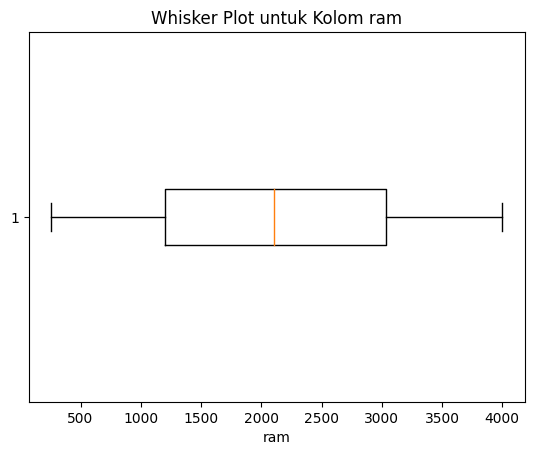

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.18619191592568


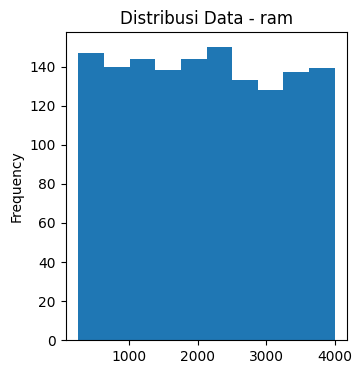

**Kolerasi dengan kolom 'price_range'**

0.9183192307843839


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                   |
|--------:|:---------------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 256 dan nilai max ada             |
|         | lah 3998. Kemudian Q1 adalah 1201, Q2 adalah 2102 dan Q3 adalah 3035.75 standar deviasi adalah 1078.35 dan mean 2106.73          |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 1834.75                                                                       |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1229, 3142 duplicate sebanyak 4               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                         |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1551.125 dan batas atas        |
|         | sebesar Q3 + 1.5IQR yakni sebesar 4870.5 nilai terkecil adalah 256 dan nilai terbesar adalah 3998 sehingga tidak ada outlier     |
|       5 | Kurtosis bernilai -1.18619191592568 (negatif) yang artinya menunjukkan menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                                 |
|       6 | Kolerasinya dengan kolom target sebesar 0.9183192307843839 , nilai kolerasi dekat dari angka 1 sehingga kolerasinya              |
|         | cukup kuat                                                                                                                       |

In [59]:
#Nomor 14 Kolom ram
finalValue('ram',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 256 dan nilai max ada
lah 3998. Kemudian Q1 adalah 1201, Q2 adalah 2102 dan Q3 adalah 3035.75 standar deviasi adalah 1078.35 dan mean 2106.73
Dari sini juga dapat disimpulkan bahwa IQR sebesar 1834.75'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1229, 3142 duplicate sebanyak 4 '''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1551.125 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 4870.5 nilai terkecil adalah 256 dan nilai terbesar adalah 3998 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.18619191592568 (negatif) yang artinya menunjukkan menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.9183192307843839 , nilai kolerasi dekat dari angka 1 sehingga kolerasinya
cukup kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar sc_h**

|       |   Statistik Dasar |
|:------|------------------:|
| count |         1400      |
| mean  |           12.2857 |
| std   |            4.2042 |
| min   |            5      |
| 25%   |            9      |
| 50%   |           12      |
| 75%   |           16      |
| max   |           19      |

**Nilai yang muncul lebih dari sekali sc_h Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
| 17 |                                   134 |
|  7 |                                   108 |
| 12 |                                   107 |
| 14 |                                   100 |
| 15 |                                   100 |
| 16 |                                    99 |
| 13 |                                    95 |
| 10 |                                    94 |
| 11 |                                    88 |
| 19 |                                    84 |
| 18 |                                    82 |
|  6 |                                    81 |
|  9 |                                    80 |
|  8 |                                    79 |
|  5 |                                    69 |

**Missing Value sc_h Data Train**

'Tidak ada missing value'

**Outlier sc_h Data Train**

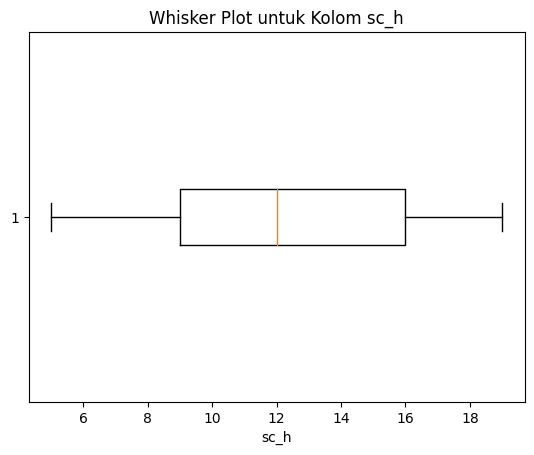

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.1833343207794749


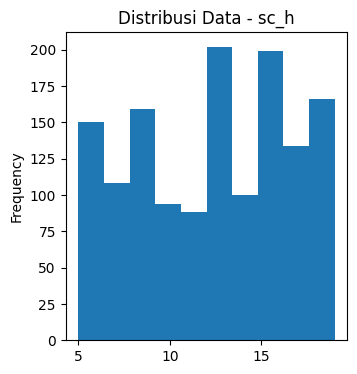

**Kolerasi dengan kolom 'price_range'**

0.012148883173074988


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 5 dan nilai max ada     |
|         | lah 19. Kemudian Q1 adalah 9, Q2 adalah 12 dan Q3 adalah 16 standar deviasi adalah 4.2042 dan mean 12.2857             |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 7                                                                   |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 17 duplicate sebanyak 134,          |
|         | 7 duplicate sebanyak 108 dan sebagainya dapat dilihat lengkap pada tabel duplicate value                               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1.5 dan batas atas   |
|         | sebesar Q3 + 1.5IQR yakni sebesar 26.5 nilai terkecil adalah 5 dan nilai terbesar adalah 19 sehingga tidak ada outlier |
|       5 | Kurtosis bernilai -1.1833343207794749 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar 0.012148883173074988, nilai kolerasi jauh dari angka 1 malah mendekati angka 0 |
|         | sehingga kolerasinya tidak kuat                                                                                        |

In [60]:
#Nomor 15 kolom sc_h
finalValue('sc_h',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 5 dan nilai max ada
lah 19. Kemudian Q1 adalah 9, Q2 adalah 12 dan Q3 adalah 16 standar deviasi adalah 4.2042 dan mean 12.2857
Dari sini juga dapat disimpulkan bahwa IQR sebesar 7'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 17 duplicate sebanyak 134, 
7 duplicate sebanyak 108 dan sebagainya dapat dilihat lengkap pada tabel duplicate value'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -1.5 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 26.5 nilai terkecil adalah 5 dan nilai terbesar adalah 19 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.1833343207794749 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.012148883173074988, nilai kolerasi jauh dari angka 1 malah mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar sc_w**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           5.665   |
| std   |           4.37223 |
| min   |           0       |
| 25%   |           2       |
| 50%   |           5       |
| 75%   |           9       |
| max   |          18       |

**Nilai yang muncul lebih dari sekali sc_w Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
|  1 |                                   151 |
|  3 |                                   144 |
|  0 |                                   137 |
|  4 |                                   136 |
|  5 |                                   108 |
|  2 |                                   104 |
|  7 |                                    96 |
|  8 |                                    88 |
|  6 |                                    81 |
| 10 |                                    73 |
|  9 |                                    67 |
| 11 |                                    50 |
| 12 |                                    45 |
| 13 |                                    38 |
| 16 |                                    23 |
| 15 |                                    21 |
| 14 |                                    19 |
| 17 |                                    14 |
| 18 |                                     5 |

**Missing Value sc_w Data Train**

'Tidak ada missing value'

**Outlier sc_w Data Train**

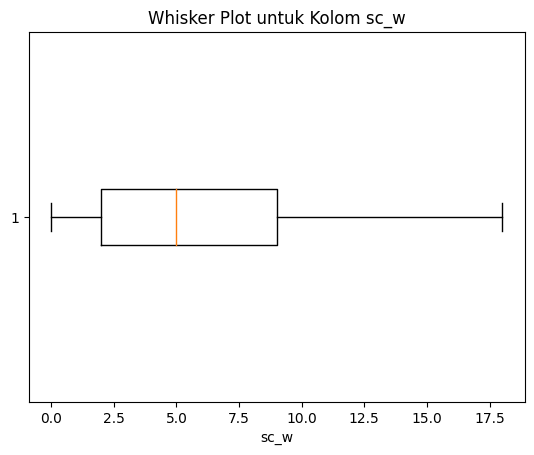

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-0.33772957471254195


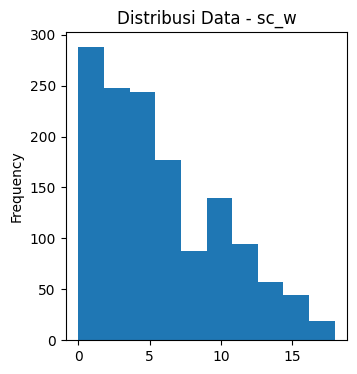

**Kolerasi dengan kolom 'price_range'**

0.019911698810365006


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada     |
|         | lah 18. Kemudian Q1 adalah 2, Q2 adalah 5 dan Q3 adalah 9 standar deviasi adalah 4.37223 dan mean 5.665                |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 7                                                                   |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1 duplicate sebanyak 151,           |
|         | 3 duplicate sebanyak 144 dan sebagainya dapat dilihat lengkap pada tabel duplicate value                               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -8.5 dan batas atas   |
|         | sebesar Q3 + 1.5IQR yakni sebesar 19.5 nilai terkecil adalah 0 dan nilai terbesar adalah 18 sehingga tidak ada outlier |
|       5 | Kurtosis bernilai -0.33772957471254195(negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata  |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar 0.019911698810365006, nilai kolerasi jauh dari angka 1 malah mendekati angka 0 |
|         | sehingga kolerasinya tidak kuat                                                                                        |

In [61]:
#Nomor 16 kolom sc_w
finalValue('sc_w',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 18. Kemudian Q1 adalah 2, Q2 adalah 5 dan Q3 adalah 9 standar deviasi adalah 4.37223 dan mean 5.665
Dari sini juga dapat disimpulkan bahwa IQR sebesar 7'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 1 duplicate sebanyak 151, 
3 duplicate sebanyak 144 dan sebagainya dapat dilihat lengkap pada tabel duplicate value'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -8.5 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 19.5 nilai terkecil adalah 0 dan nilai terbesar adalah 18 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -0.33772957471254195(negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.019911698810365006, nilai kolerasi jauh dari angka 1 malah mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar talk_time**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |          11.0421  |
| std   |           5.39905 |
| min   |           2       |
| 25%   |           6       |
| 50%   |          11       |
| 75%   |          16       |
| max   |          20       |

**Nilai yang muncul lebih dari sekali talk_time Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
| 15 |                                    86 |
| 16 |                                    82 |
|  4 |                                    81 |
|  7 |                                    81 |
| 19 |                                    80 |
|  8 |                                    79 |
|  9 |                                    78 |
| 12 |                                    78 |
| 18 |                                    77 |
| 14 |                                    77 |
|  6 |                                    77 |
| 11 |                                    73 |
|  2 |                                    69 |
| 10 |                                    68 |
| 13 |                                    65 |
|  5 |                                    63 |
|  3 |                                    63 |
| 20 |                                    63 |
| 17 |                                    60 |

**Missing Value talk_time Data Train**

'Tidak ada missing value'

**Outlier talk_time Data Train**

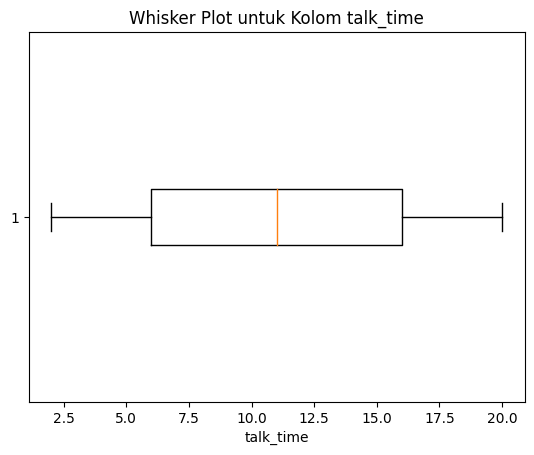

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.192047843180249


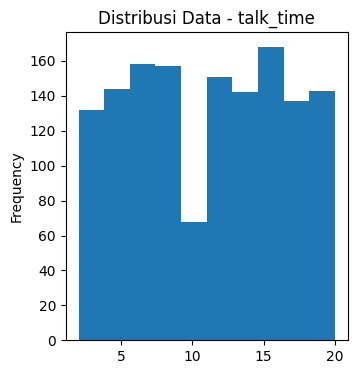

**Kolerasi dengan kolom 'price_range'**

0.011112731754754877


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                         |
|--------:|:-----------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 2 dan nilai max ada     |
|         | lah 20. Kemudian Q1 adalah 6, Q2 adalah 11 dan Q3 adalah 16 standar deviasi adalah 5.39905 dan mean 11.0421            |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 10                                                                  |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 15 duplicate sebanyak 86,           |
|         | 16 duplicate sebanyak 82 dan sebagainya dapat dilihat lengkap pada tabel duplicate value                               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                               |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -9 dan batas atas     |
|         | sebesar Q3 + 1.5IQR yakni sebesar 31 nilai terkecil adalah 2 dan nilai terbesar adalah 20 sehingga tidak ada outlier   |
|       5 | Kurtosis bernilai -1.192047843180249(negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata    |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                       |
|       6 | Kolerasinya dengan kolom target sebesar 0.011112731754754877, nilai kolerasi jauh dari angka 1 malah mendekati angka 0 |
|         | sehingga kolerasinya tidak kuat                                                                                        |

In [62]:
#Nomor 17 kolom talk_time
finalValue('talk_time',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 2 dan nilai max ada
lah 20. Kemudian Q1 adalah 6, Q2 adalah 11 dan Q3 adalah 16 standar deviasi adalah 5.39905 dan mean 11.0421
Dari sini juga dapat disimpulkan bahwa IQR sebesar 10'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 15 duplicate sebanyak 86, 
16 duplicate sebanyak 82 dan sebagainya dapat dilihat lengkap pada tabel duplicate value'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -9 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 31 nilai terkecil adalah 2 dan nilai terbesar adalah 20 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.192047843180249(negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.011112731754754877, nilai kolerasi jauh dari angka 1 malah mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar three_g**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 1 |
| freq   |              1065 |

**Nilai yang muncul lebih dari sekali three_g Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| True  |                                  1065 |
| False |                                   335 |

**Missing Value three_g Data Train**

'Tidak ada missing value'

**Outlier three_g Data Train**

Tidak ada outlier

**Distribusi data**

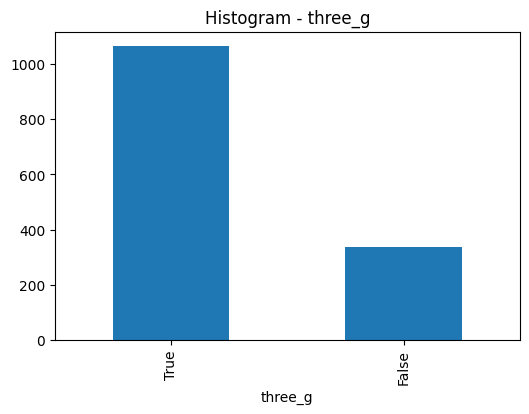

**Kolerasi dengan kolom 'price_range'**

0.02709762831217497


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                               |
|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400               |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 1065 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 1065 dan 0(False) sebanyak 335                       |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                     |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                 |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                 |
|       6 | Kolerasinya dengan kolom target sebesar 0.02709762831217497, nilai kolerasi jauh dari angka 1 malah mendekati angka 0                        |
|         | sehingga kolerasinya tidak kuat                                                                                                              |

In [63]:
#Nomor 18 kolom three_g 
finalValue('three_g',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 1(True) sebanyak 1065'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 1065 dan 0(False) sebanyak 335'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.02709762831217497, nilai kolerasi jauh dari angka 1 malah mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar touch_screen**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 0 |
| freq   |               715 |

**Nilai yang muncul lebih dari sekali touch_screen Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| False |                                   715 |
| True  |                                   685 |

**Missing Value touch_screen Data Train**

'Tidak ada missing value'

**Outlier touch_screen Data Train**

Tidak ada outlier

**Distribusi data**

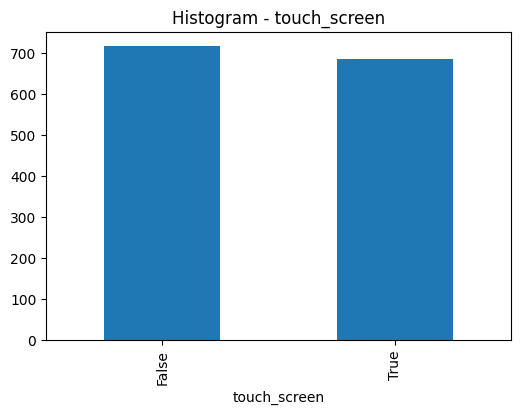

**Kolerasi dengan kolom 'price_range'**

-0.029842480103711946


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                               |
|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400               |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 715 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 685 dan 0(False) sebanyak 715                        |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                     |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                 |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                 |
|       6 | Kolerasinya dengan kolom target sebesar -0.029842480103711946, nilai kolerasi jauh dari angka -1 malah mendekati angka 0                     |
|         | sehingga kolerasinya tidak kuat, tapi karena nilai ini negatif kemungkinan berpengaruhnya berbanding terbalik terhadap kolom target          |
|         | tapi pengaruhnya tidak kuat                                                                                                                  |

In [64]:
#Nomor 19 kolom touch_screen
finalValue('touch_screen',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 715'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 685 dan 0(False) sebanyak 715'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar -0.029842480103711946, nilai kolerasi jauh dari angka -1 malah mendekati angka 0
sehingga kolerasinya tidak kuat, tapi karena nilai ini negatif kemungkinan berpengaruhnya berbanding terbalik terhadap kolom target
tapi pengaruhnya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar wifi**

|        |   Statistik Dasar |
|:-------|------------------:|
| count  |              1400 |
| unique |                 2 |
| top    |                 0 |
| freq   |               707 |

**Nilai yang muncul lebih dari sekali wifi Data Train**

|       |   Nilai yang lebih muncul dari sekali |
|:------|--------------------------------------:|
| False |                                   707 |
| True  |                                   693 |

**Missing Value wifi Data Train**

'Tidak ada missing value'

**Outlier wifi Data Train**

Tidak ada outlier

**Distribusi data**

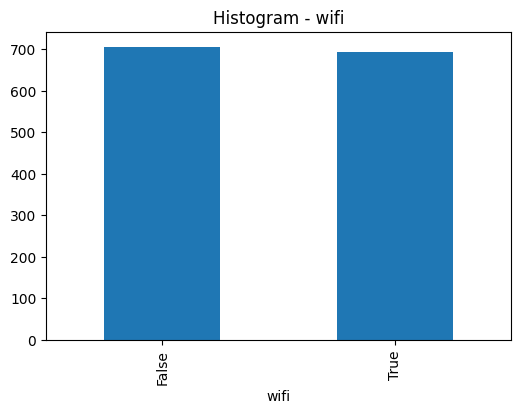

**Kolerasi dengan kolom 'price_range'**

0.03432935762117287


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                                               |
|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------|
|       1 | Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400               |
|         | dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 707 |
|       2 | Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 693 dan 0(False) sebanyak 707                        |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                                     |
|       4 | Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu                                 |
|       5 | Tidak memiliki nilai kurtosis karena tipe data bukan numerik                                                                                 |
|       6 | Kolerasinya dengan kolom target sebesar 0.03432935762117287, nilai kolerasi jauh dari angka 1 malah mendekati angka 0                        |
|         | sehingga kolerasinya tidak kuat                                                                                                              |

In [65]:
#Nomor 20 kolom wifi
finalValue('wifi',df)
#Hasil Analisis
string1 = '''Tipe data kolom ini adalah boolean sehingga statistika dasar yang didapat adalah sebagai berikut jumlah data ada sebanyak 1400 
dengan nilai unique sebanyak 2 yang artinya hanya ada kemungkinan dua nilai dan nilai yang paling sering muncul adalah 0(False) sebanyak 707'''
string2 = '''Karena hanya terdiri dari dua kategori pasti ada duplicate value yakni 1(True) sebanyak 693 dan 0(False) sebanyak 707'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier karena semua data nilainya kalo tidak 1(True) dia akan 0(False) tidak ada yang di luar itu'''
string5 = '''Tidak memiliki nilai kurtosis karena tipe data bukan numerik'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.03432935762117287, nilai kolerasi jauh dari angka 1 malah mendekati angka 0
sehingga kolerasinya tidak kuat'''
analisis(string1, string2, string3, string4, string5, string6)

**Statistika Dasar price_range**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           1.47786 |
| std   |           1.11757 |
| min   |           0       |
| 25%   |           0       |
| 50%   |           1       |
| 75%   |           2       |
| max   |           3       |

**Nilai yang muncul lebih dari sekali price_range Data Train**

|    |   Nilai yang lebih muncul dari sekali |
|---:|--------------------------------------:|
|  0 |                                   358 |
|  1 |                                   356 |
|  2 |                                   345 |
|  3 |                                   341 |

**Missing Value price_range Data Train**

'Tidak ada missing value'

**Outlier price_range Data Train**

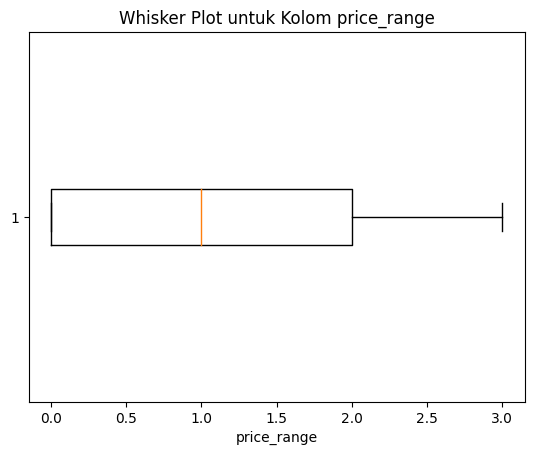

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.3572745403899689


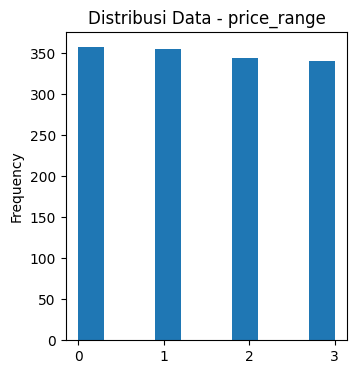

**Kolerasi dengan kolom 'price_range'**

0.9999999999999998


Hasil Analisis

**Hasil Analisis**

|   Nomor | Hasil Analisis                                                                                                              |
|--------:|:----------------------------------------------------------------------------------------------------------------------------|
|       1 | Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada          |
|         | lah 3. Kemudian Q1 adalah 0, Q2 adalah 1 dan Q3 adalah 2 standar deviasi adalah 1.11757 dan mean 1.47786                    |
|         | Dari sini juga dapat disimpulkan bahwa IQR sebesar 1                                                                        |
|       2 | Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 0 duplicate sebanyak 358, 1              |
|         | duplicate sebanyak 356, 2 duplicate sebanyak 345 dan 3 duplicate sebanyak 341                                               |
|       3 | Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai                                                    |
|       4 | Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -741 dan batas atas        |
|         | sebesar Q3 + 1.5IQR yakni sebesar 1965 nilai terkecil adalah 0 dan nilai terbesar adalah 1960 sehingga tidak ada outlier    |
|       5 | Kurtosis bernilai -1.3572745403899689 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata       |
|         | dan memiliki ekor yang lebih panjang daripada distribusi normal.                                                            |
|       6 | Kolerasinya dengan kolom target sebesar 0.9999999999999998 sangat kuat karena memang kolom target disini adalah price_range |
|         | itu sendiri                                                                                                                 |

In [67]:
#Nomor 21 kolom price_range
finalValue('price_range',df)
#Hasil Analisis
string1 = '''Di dapat dari statistika dasar bahwa jumlah data ada sebanyak 1400 dengan nilai minimun adalah 0 dan nilai max ada
lah 3. Kemudian Q1 adalah 0, Q2 adalah 1 dan Q3 adalah 2 standar deviasi adalah 1.11757 dan mean 1.47786
Dari sini juga dapat disimpulkan bahwa IQR sebesar 1'''
string2 = '''Ada beberapa duplicate value pada tabel ini dengan yang paling banyak adalah angka 0 duplicate sebanyak 358, 1 
duplicate sebanyak 356, 2 duplicate sebanyak 345 dan 3 duplicate sebanyak 341'''
string3 = '''Tidak ada missing value, Artinya pada kolom ini semuanya mempunyai nilai'''
string4 = '''Tidak ada outlier hal ini seperti yang diketahui batas bawahnya adalah Q1 - 1.5IQR yakni sebesar -741 dan batas atas
sebesar Q3 + 1.5IQR yakni sebesar 1965 nilai terkecil adalah 0 dan nilai terbesar adalah 1960 sehingga tidak ada outlier'''
string5 = '''Kurtosis bernilai -1.3572745403899689 (negatif) yang artinya menunjukkan cenderung berkumpul lebih dekat ke rata-rata 
dan memiliki ekor yang lebih panjang daripada distribusi normal.'''
string6 = '''Kolerasinya dengan kolom target sebesar 0.9999999999999998 sangat kuat karena memang kolom target disini adalah price_range
itu sendiri'''
analisis(string1, string2, string3, string4, string5, string6)